# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [283]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [284]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [285]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [286]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [287]:
x_train.shape

(160, 1)

In [288]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


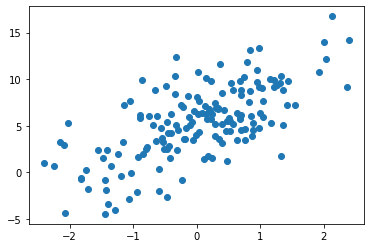

In [289]:
plt.scatter(x_train, y_train)

In [290]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [291]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 100



In [292]:
criterion = torch.nn.MSELoss() 

In [293]:
#!!! Note that training in the code below done outside of epoch loop.
model.train()
hs = []
train_loss = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs = Variable(torch.from_numpy(x_train).cuda())
            labels = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs = Variable(torch.from_numpy(x_train))
            labels = Variable(torch.from_numpy(y_train))
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))
    train_loss.append(loss)

h: 2 | epoch: 0, loss: 50.912784576416016
h: 2 | epoch: 1, loss: 50.58735275268555
h: 2 | epoch: 2, loss: 50.263694763183594
h: 2 | epoch: 3, loss: 49.941688537597656
h: 2 | epoch: 4, loss: 49.6212043762207
h: 2 | epoch: 5, loss: 49.30213165283203
h: 2 | epoch: 6, loss: 48.98435592651367
h: 2 | epoch: 7, loss: 48.66777420043945
h: 2 | epoch: 8, loss: 48.35227966308594
h: 2 | epoch: 9, loss: 48.03777313232422
h: 2 | epoch: 10, loss: 47.72416687011719
h: 2 | epoch: 11, loss: 47.411354064941406
h: 2 | epoch: 12, loss: 47.099266052246094
h: 2 | epoch: 13, loss: 46.787803649902344
h: 2 | epoch: 14, loss: 46.476890563964844
h: 2 | epoch: 15, loss: 46.16645050048828
h: 2 | epoch: 16, loss: 45.856407165527344
h: 2 | epoch: 17, loss: 45.54668045043945
h: 2 | epoch: 18, loss: 45.237220764160156
h: 2 | epoch: 19, loss: 44.927955627441406
h: 2 | epoch: 20, loss: 44.61881637573242
h: 2 | epoch: 21, loss: 44.309757232666016
h: 2 | epoch: 22, loss: 44.000709533691406
h: 2 | epoch: 23, loss: 43.691627

h: 4 | epoch: 77, loss: 21.02531623840332
h: 4 | epoch: 78, loss: 20.76927375793457
h: 4 | epoch: 79, loss: 20.51625633239746
h: 4 | epoch: 80, loss: 20.266292572021484
h: 4 | epoch: 81, loss: 20.019420623779297
h: 4 | epoch: 82, loss: 19.775663375854492
h: 4 | epoch: 83, loss: 19.535057067871094
h: 4 | epoch: 84, loss: 19.29762077331543
h: 4 | epoch: 85, loss: 19.06338882446289
h: 4 | epoch: 86, loss: 18.832372665405273
h: 4 | epoch: 87, loss: 18.604604721069336
h: 4 | epoch: 88, loss: 18.38010025024414
h: 4 | epoch: 89, loss: 18.158876419067383
h: 4 | epoch: 90, loss: 17.94094467163086
h: 4 | epoch: 91, loss: 17.72632598876953
h: 4 | epoch: 92, loss: 17.51502227783203
h: 4 | epoch: 93, loss: 17.307048797607422
h: 4 | epoch: 94, loss: 17.102415084838867
h: 4 | epoch: 95, loss: 16.901119232177734
h: 4 | epoch: 96, loss: 16.703168869018555
h: 4 | epoch: 97, loss: 16.508563995361328
h: 4 | epoch: 98, loss: 16.317298889160156
h: 4 | epoch: 99, loss: 16.129377365112305
h: 5 | epoch: 0, los

h: 7 | epoch: 79, loss: 14.558767318725586
h: 7 | epoch: 80, loss: 14.369438171386719
h: 7 | epoch: 81, loss: 14.184808731079102
h: 7 | epoch: 82, loss: 14.00482177734375
h: 7 | epoch: 83, loss: 13.829419136047363
h: 7 | epoch: 84, loss: 13.658544540405273
h: 7 | epoch: 85, loss: 13.492136001586914
h: 7 | epoch: 86, loss: 13.330129623413086
h: 7 | epoch: 87, loss: 13.172464370727539
h: 7 | epoch: 88, loss: 13.019073486328125
h: 7 | epoch: 89, loss: 12.86988639831543
h: 7 | epoch: 90, loss: 12.724841117858887
h: 7 | epoch: 91, loss: 12.583864212036133
h: 7 | epoch: 92, loss: 12.44688606262207
h: 7 | epoch: 93, loss: 12.313835144042969
h: 7 | epoch: 94, loss: 12.184638977050781
h: 7 | epoch: 95, loss: 12.059226036071777
h: 7 | epoch: 96, loss: 11.937520980834961
h: 7 | epoch: 97, loss: 11.819453239440918
h: 7 | epoch: 98, loss: 11.704946517944336
h: 7 | epoch: 99, loss: 11.593925476074219
h: 8 | epoch: 0, loss: 42.423519134521484
h: 8 | epoch: 1, loss: 42.04026794433594
h: 8 | epoch: 2, 

h: 11 | epoch: 1, loss: 39.64670944213867
h: 11 | epoch: 2, loss: 39.11001968383789
h: 11 | epoch: 3, loss: 38.58193588256836
h: 11 | epoch: 4, loss: 38.06212615966797
h: 11 | epoch: 5, loss: 37.55026626586914
h: 11 | epoch: 6, loss: 37.04606628417969
h: 11 | epoch: 7, loss: 36.54924774169922
h: 11 | epoch: 8, loss: 36.059547424316406
h: 11 | epoch: 9, loss: 35.57673645019531
h: 11 | epoch: 10, loss: 35.1005744934082
h: 11 | epoch: 11, loss: 34.630863189697266
h: 11 | epoch: 12, loss: 34.16740036010742
h: 11 | epoch: 13, loss: 33.71001434326172
h: 11 | epoch: 14, loss: 33.25852584838867
h: 11 | epoch: 15, loss: 32.812782287597656
h: 11 | epoch: 16, loss: 32.372642517089844
h: 11 | epoch: 17, loss: 31.937969207763672
h: 11 | epoch: 18, loss: 31.508642196655273
h: 11 | epoch: 19, loss: 31.084548950195312
h: 11 | epoch: 20, loss: 30.665578842163086
h: 11 | epoch: 21, loss: 30.25164222717285
h: 11 | epoch: 22, loss: 29.842647552490234
h: 11 | epoch: 23, loss: 29.438522338867188
h: 11 | epo

h: 14 | epoch: 25, loss: 27.442153930664062
h: 14 | epoch: 26, loss: 27.00667381286621
h: 14 | epoch: 27, loss: 26.577316284179688
h: 14 | epoch: 28, loss: 26.154062271118164
h: 14 | epoch: 29, loss: 25.736896514892578
h: 14 | epoch: 30, loss: 25.3257999420166
h: 14 | epoch: 31, loss: 24.920764923095703
h: 14 | epoch: 32, loss: 24.52178192138672
h: 14 | epoch: 33, loss: 24.128847122192383
h: 14 | epoch: 34, loss: 23.741947174072266
h: 14 | epoch: 35, loss: 23.361080169677734
h: 14 | epoch: 36, loss: 22.98624038696289
h: 14 | epoch: 37, loss: 22.617429733276367
h: 14 | epoch: 38, loss: 22.254640579223633
h: 14 | epoch: 39, loss: 21.897869110107422
h: 14 | epoch: 40, loss: 21.547109603881836
h: 14 | epoch: 41, loss: 21.202360153198242
h: 14 | epoch: 42, loss: 20.86361312866211
h: 14 | epoch: 43, loss: 20.530860900878906
h: 14 | epoch: 44, loss: 20.204090118408203
h: 14 | epoch: 45, loss: 19.88330078125
h: 14 | epoch: 46, loss: 19.568471908569336
h: 14 | epoch: 47, loss: 19.25959587097168

h: 17 | epoch: 41, loss: 21.212316513061523
h: 17 | epoch: 42, loss: 20.831785202026367
h: 17 | epoch: 43, loss: 20.45962905883789
h: 17 | epoch: 44, loss: 20.095767974853516
h: 17 | epoch: 45, loss: 19.7401123046875
h: 17 | epoch: 46, loss: 19.392581939697266
h: 17 | epoch: 47, loss: 19.053081512451172
h: 17 | epoch: 48, loss: 18.72153663635254
h: 17 | epoch: 49, loss: 18.39785385131836
h: 17 | epoch: 50, loss: 18.08194351196289
h: 17 | epoch: 51, loss: 17.773717880249023
h: 17 | epoch: 52, loss: 17.473087310791016
h: 17 | epoch: 53, loss: 17.17995834350586
h: 17 | epoch: 54, loss: 16.894235610961914
h: 17 | epoch: 55, loss: 16.615827560424805
h: 17 | epoch: 56, loss: 16.344636917114258
h: 17 | epoch: 57, loss: 16.0805606842041
h: 17 | epoch: 58, loss: 15.823504447937012
h: 17 | epoch: 59, loss: 15.5733642578125
h: 17 | epoch: 60, loss: 15.330038070678711
h: 17 | epoch: 61, loss: 15.093421936035156
h: 17 | epoch: 62, loss: 14.863409042358398
h: 17 | epoch: 63, loss: 14.639892578125
h:

h: 20 | epoch: 37, loss: 15.5197114944458
h: 20 | epoch: 38, loss: 15.188104629516602
h: 20 | epoch: 39, loss: 14.871417045593262
h: 20 | epoch: 40, loss: 14.569048881530762
h: 20 | epoch: 41, loss: 14.280420303344727
h: 20 | epoch: 42, loss: 14.004968643188477
h: 20 | epoch: 43, loss: 13.742154121398926
h: 20 | epoch: 44, loss: 13.491453170776367
h: 20 | epoch: 45, loss: 13.252362251281738
h: 20 | epoch: 46, loss: 13.024395942687988
h: 20 | epoch: 47, loss: 12.80708122253418
h: 20 | epoch: 48, loss: 12.599969863891602
h: 20 | epoch: 49, loss: 12.402620315551758
h: 20 | epoch: 50, loss: 12.214615821838379
h: 20 | epoch: 51, loss: 12.03554630279541
h: 20 | epoch: 52, loss: 11.865022659301758
h: 20 | epoch: 53, loss: 11.702669143676758
h: 20 | epoch: 54, loss: 11.548123359680176
h: 20 | epoch: 55, loss: 11.40103530883789
h: 20 | epoch: 56, loss: 11.261070251464844
h: 20 | epoch: 57, loss: 11.12790584564209
h: 20 | epoch: 58, loss: 11.001233100891113
h: 20 | epoch: 59, loss: 10.8807535171

h: 23 | epoch: 69, loss: 9.992459297180176
h: 23 | epoch: 70, loss: 9.91798210144043
h: 23 | epoch: 71, loss: 9.847184181213379
h: 23 | epoch: 72, loss: 9.77989387512207
h: 23 | epoch: 73, loss: 9.715951919555664
h: 23 | epoch: 74, loss: 9.655200958251953
h: 23 | epoch: 75, loss: 9.59749698638916
h: 23 | epoch: 76, loss: 9.542693138122559
h: 23 | epoch: 77, loss: 9.490653038024902
h: 23 | epoch: 78, loss: 9.441247940063477
h: 23 | epoch: 79, loss: 9.394350051879883
h: 23 | epoch: 80, loss: 9.34984016418457
h: 23 | epoch: 81, loss: 9.30760383605957
h: 23 | epoch: 82, loss: 9.26753044128418
h: 23 | epoch: 83, loss: 9.229516983032227
h: 23 | epoch: 84, loss: 9.193458557128906
h: 23 | epoch: 85, loss: 9.159262657165527
h: 23 | epoch: 86, loss: 9.126836776733398
h: 23 | epoch: 87, loss: 9.096094131469727
h: 23 | epoch: 88, loss: 9.066949844360352
h: 23 | epoch: 89, loss: 9.039325714111328
h: 23 | epoch: 90, loss: 9.013143539428711
h: 23 | epoch: 91, loss: 8.98833179473877
h: 23 | epoch: 92,

h: 26 | epoch: 44, loss: 12.49749755859375
h: 26 | epoch: 45, loss: 12.28321647644043
h: 26 | epoch: 46, loss: 12.079995155334473
h: 26 | epoch: 47, loss: 11.887308120727539
h: 26 | epoch: 48, loss: 11.704656600952148
h: 26 | epoch: 49, loss: 11.5315580368042
h: 26 | epoch: 50, loss: 11.36755657196045
h: 26 | epoch: 51, loss: 11.21220874786377
h: 26 | epoch: 52, loss: 11.065092086791992
h: 26 | epoch: 53, loss: 10.925800323486328
h: 26 | epoch: 54, loss: 10.79394817352295
h: 26 | epoch: 55, loss: 10.66916561126709
h: 26 | epoch: 56, loss: 10.55109691619873
h: 26 | epoch: 57, loss: 10.439406394958496
h: 26 | epoch: 58, loss: 10.333767890930176
h: 26 | epoch: 59, loss: 10.233871459960938
h: 26 | epoch: 60, loss: 10.139425277709961
h: 26 | epoch: 61, loss: 10.050149917602539
h: 26 | epoch: 62, loss: 9.965770721435547
h: 26 | epoch: 63, loss: 9.886037826538086
h: 26 | epoch: 64, loss: 9.810704231262207
h: 26 | epoch: 65, loss: 9.739541053771973
h: 26 | epoch: 66, loss: 9.672327041625977
h:

h: 28 | epoch: 84, loss: 8.810796737670898
h: 28 | epoch: 85, loss: 8.796327590942383
h: 28 | epoch: 86, loss: 8.78268051147461
h: 28 | epoch: 87, loss: 8.769807815551758
h: 28 | epoch: 88, loss: 8.757665634155273
h: 28 | epoch: 89, loss: 8.746211051940918
h: 28 | epoch: 90, loss: 8.735406875610352
h: 28 | epoch: 91, loss: 8.725212097167969
h: 28 | epoch: 92, loss: 8.715595245361328
h: 28 | epoch: 93, loss: 8.706521034240723
h: 28 | epoch: 94, loss: 8.697957992553711
h: 28 | epoch: 95, loss: 8.6898775100708
h: 28 | epoch: 96, loss: 8.682252883911133
h: 28 | epoch: 97, loss: 8.675054550170898
h: 28 | epoch: 98, loss: 8.66826057434082
h: 28 | epoch: 99, loss: 8.661849975585938
h: 29 | epoch: 0, loss: 49.394325256347656
h: 29 | epoch: 1, loss: 47.801513671875
h: 29 | epoch: 2, loss: 46.27383804321289
h: 29 | epoch: 3, loss: 44.80760955810547
h: 29 | epoch: 4, loss: 43.39948272705078
h: 29 | epoch: 5, loss: 42.046363830566406
h: 29 | epoch: 6, loss: 40.74541091918945
h: 29 | epoch: 7, loss

h: 31 | epoch: 23, loss: 27.6306095123291
h: 31 | epoch: 24, loss: 26.970455169677734
h: 31 | epoch: 25, loss: 26.332721710205078
h: 31 | epoch: 26, loss: 25.716541290283203
h: 31 | epoch: 27, loss: 25.121103286743164
h: 31 | epoch: 28, loss: 24.54563331604004
h: 31 | epoch: 29, loss: 23.989397048950195
h: 31 | epoch: 30, loss: 23.451698303222656
h: 31 | epoch: 31, loss: 22.931884765625
h: 31 | epoch: 32, loss: 22.429323196411133
h: 31 | epoch: 33, loss: 21.943416595458984
h: 31 | epoch: 34, loss: 21.47359275817871
h: 31 | epoch: 35, loss: 21.01931381225586
h: 31 | epoch: 36, loss: 20.580055236816406
h: 31 | epoch: 37, loss: 20.155319213867188
h: 31 | epoch: 38, loss: 19.744632720947266
h: 31 | epoch: 39, loss: 19.347532272338867
h: 31 | epoch: 40, loss: 18.963581085205078
h: 31 | epoch: 41, loss: 18.592363357543945
h: 31 | epoch: 42, loss: 18.233463287353516
h: 31 | epoch: 43, loss: 17.886497497558594
h: 31 | epoch: 44, loss: 17.55108642578125
h: 31 | epoch: 45, loss: 17.2268638610839

h: 33 | epoch: 78, loss: 8.809305191040039
h: 33 | epoch: 79, loss: 8.792238235473633
h: 33 | epoch: 80, loss: 8.776300430297852
h: 33 | epoch: 81, loss: 8.761417388916016
h: 33 | epoch: 82, loss: 8.747518539428711
h: 33 | epoch: 83, loss: 8.734537124633789
h: 33 | epoch: 84, loss: 8.722416877746582
h: 33 | epoch: 85, loss: 8.71109676361084
h: 33 | epoch: 86, loss: 8.700525283813477
h: 33 | epoch: 87, loss: 8.690653800964355
h: 33 | epoch: 88, loss: 8.681434631347656
h: 33 | epoch: 89, loss: 8.67282485961914
h: 33 | epoch: 90, loss: 8.66478443145752
h: 33 | epoch: 91, loss: 8.65727424621582
h: 33 | epoch: 92, loss: 8.650259971618652
h: 33 | epoch: 93, loss: 8.643708229064941
h: 33 | epoch: 94, loss: 8.637588500976562
h: 33 | epoch: 95, loss: 8.631872177124023
h: 33 | epoch: 96, loss: 8.626533508300781
h: 33 | epoch: 97, loss: 8.621545791625977
h: 33 | epoch: 98, loss: 8.6168851852417
h: 33 | epoch: 99, loss: 8.612531661987305
h: 34 | epoch: 0, loss: 43.0235710144043
h: 34 | epoch: 1, l

h: 36 | epoch: 28, loss: 17.2462100982666
h: 36 | epoch: 29, loss: 16.779666900634766
h: 36 | epoch: 30, loss: 16.33603286743164
h: 36 | epoch: 31, loss: 15.91430950164795
h: 36 | epoch: 32, loss: 15.513545036315918
h: 36 | epoch: 33, loss: 15.132822036743164
h: 36 | epoch: 34, loss: 14.771247863769531
h: 36 | epoch: 35, loss: 14.427978515625
h: 36 | epoch: 36, loss: 14.102188110351562
h: 36 | epoch: 37, loss: 13.793092727661133
h: 36 | epoch: 38, loss: 13.499931335449219
h: 36 | epoch: 39, loss: 13.221972465515137
h: 36 | epoch: 40, loss: 12.958517074584961
h: 36 | epoch: 41, loss: 12.708887100219727
h: 36 | epoch: 42, loss: 12.47243595123291
h: 36 | epoch: 43, loss: 12.24853801727295
h: 36 | epoch: 44, loss: 12.036595344543457
h: 36 | epoch: 45, loss: 11.836034774780273
h: 36 | epoch: 46, loss: 11.646303176879883
h: 36 | epoch: 47, loss: 11.46687126159668
h: 36 | epoch: 48, loss: 11.297231674194336
h: 36 | epoch: 49, loss: 11.136897087097168
h: 36 | epoch: 50, loss: 10.98540687561035

h: 38 | epoch: 83, loss: 8.706670761108398
h: 38 | epoch: 84, loss: 8.696307182312012
h: 38 | epoch: 85, loss: 8.686626434326172
h: 38 | epoch: 86, loss: 8.677582740783691
h: 38 | epoch: 87, loss: 8.669135093688965
h: 38 | epoch: 88, loss: 8.661245346069336
h: 38 | epoch: 89, loss: 8.653877258300781
h: 38 | epoch: 90, loss: 8.646993637084961
h: 38 | epoch: 91, loss: 8.640565872192383
h: 38 | epoch: 92, loss: 8.634562492370605
h: 38 | epoch: 93, loss: 8.628957748413086
h: 38 | epoch: 94, loss: 8.623722076416016
h: 38 | epoch: 95, loss: 8.618833541870117
h: 38 | epoch: 96, loss: 8.614267349243164
h: 38 | epoch: 97, loss: 8.610005378723145
h: 38 | epoch: 98, loss: 8.606022834777832
h: 38 | epoch: 99, loss: 8.60230541229248
h: 39 | epoch: 0, loss: 42.82960891723633
h: 39 | epoch: 1, loss: 41.12213897705078
h: 39 | epoch: 2, loss: 39.5001106262207
h: 39 | epoch: 3, loss: 37.958473205566406
h: 39 | epoch: 4, loss: 36.49262619018555
h: 39 | epoch: 5, loss: 35.098304748535156
h: 39 | epoch: 6,

h: 41 | epoch: 36, loss: 15.769024848937988
h: 41 | epoch: 37, loss: 15.415674209594727
h: 41 | epoch: 38, loss: 15.077908515930176
h: 41 | epoch: 39, loss: 14.755142211914062
h: 41 | epoch: 40, loss: 14.446802139282227
h: 41 | epoch: 41, loss: 14.152338981628418
h: 41 | epoch: 42, loss: 13.87121868133545
h: 41 | epoch: 43, loss: 13.60291862487793
h: 41 | epoch: 44, loss: 13.34693717956543
h: 41 | epoch: 45, loss: 13.102787971496582
h: 41 | epoch: 46, loss: 12.869999885559082
h: 41 | epoch: 47, loss: 12.648110389709473
h: 41 | epoch: 48, loss: 12.436677932739258
h: 41 | epoch: 49, loss: 12.235273361206055
h: 41 | epoch: 50, loss: 12.043481826782227
h: 41 | epoch: 51, loss: 11.860901832580566
h: 41 | epoch: 52, loss: 11.68714427947998
h: 41 | epoch: 53, loss: 11.521832466125488
h: 41 | epoch: 54, loss: 11.364603042602539
h: 41 | epoch: 55, loss: 11.215107917785645
h: 41 | epoch: 56, loss: 11.073006629943848
h: 41 | epoch: 57, loss: 10.937975883483887
h: 41 | epoch: 58, loss: 10.80969905

h: 43 | epoch: 74, loss: 8.80606746673584
h: 43 | epoch: 75, loss: 8.788335800170898
h: 43 | epoch: 76, loss: 8.771814346313477
h: 43 | epoch: 77, loss: 8.75642204284668
h: 43 | epoch: 78, loss: 8.742085456848145
h: 43 | epoch: 79, loss: 8.728731155395508
h: 43 | epoch: 80, loss: 8.716293334960938
h: 43 | epoch: 81, loss: 8.704710006713867
h: 43 | epoch: 82, loss: 8.693922996520996
h: 43 | epoch: 83, loss: 8.683880805969238
h: 43 | epoch: 84, loss: 8.674529075622559
h: 43 | epoch: 85, loss: 8.665824890136719
h: 43 | epoch: 86, loss: 8.657720565795898
h: 43 | epoch: 87, loss: 8.650178909301758
h: 43 | epoch: 88, loss: 8.643158912658691
h: 43 | epoch: 89, loss: 8.636625289916992
h: 43 | epoch: 90, loss: 8.630544662475586
h: 43 | epoch: 91, loss: 8.624884605407715
h: 43 | epoch: 92, loss: 8.619619369506836
h: 43 | epoch: 93, loss: 8.614720344543457
h: 43 | epoch: 94, loss: 8.610162734985352
h: 43 | epoch: 95, loss: 8.605920791625977
h: 43 | epoch: 96, loss: 8.601974487304688
h: 43 | epoch

h: 46 | epoch: 29, loss: 12.1201753616333
h: 46 | epoch: 30, loss: 11.823529243469238
h: 46 | epoch: 31, loss: 11.551424980163574
h: 46 | epoch: 32, loss: 11.3018798828125
h: 46 | epoch: 33, loss: 11.0730619430542
h: 46 | epoch: 34, loss: 10.86328411102295
h: 46 | epoch: 35, loss: 10.670988082885742
h: 46 | epoch: 36, loss: 10.494743347167969
h: 46 | epoch: 37, loss: 10.333227157592773
h: 46 | epoch: 38, loss: 10.185226440429688
h: 46 | epoch: 39, loss: 10.049623489379883
h: 46 | epoch: 40, loss: 9.925387382507324
h: 46 | epoch: 41, loss: 9.811574935913086
h: 46 | epoch: 42, loss: 9.707316398620605
h: 46 | epoch: 43, loss: 9.61181354522705
h: 46 | epoch: 44, loss: 9.524333000183105
h: 46 | epoch: 45, loss: 9.444201469421387
h: 46 | epoch: 46, loss: 9.370802879333496
h: 46 | epoch: 47, loss: 9.303567886352539
h: 46 | epoch: 48, loss: 9.241976737976074
h: 46 | epoch: 49, loss: 9.185555458068848
h: 46 | epoch: 50, loss: 9.13386344909668
h: 46 | epoch: 51, loss: 9.086503982543945
h: 46 | e

h: 48 | epoch: 88, loss: 9.041131973266602
h: 48 | epoch: 89, loss: 9.017151832580566
h: 48 | epoch: 90, loss: 8.994314193725586
h: 48 | epoch: 91, loss: 8.97256851196289
h: 48 | epoch: 92, loss: 8.951863288879395
h: 48 | epoch: 93, loss: 8.932149887084961
h: 48 | epoch: 94, loss: 8.91338062286377
h: 48 | epoch: 95, loss: 8.895513534545898
h: 48 | epoch: 96, loss: 8.878507614135742
h: 48 | epoch: 97, loss: 8.862319946289062
h: 48 | epoch: 98, loss: 8.846914291381836
h: 48 | epoch: 99, loss: 8.832252502441406
h: 49 | epoch: 0, loss: 58.104393005371094
h: 49 | epoch: 1, loss: 54.37213134765625
h: 49 | epoch: 2, loss: 50.92924118041992
h: 49 | epoch: 3, loss: 47.75018310546875
h: 49 | epoch: 4, loss: 44.8122673034668
h: 49 | epoch: 5, loss: 42.09528350830078
h: 49 | epoch: 6, loss: 39.581138610839844
h: 49 | epoch: 7, loss: 37.25359344482422
h: 49 | epoch: 8, loss: 35.09798049926758
h: 49 | epoch: 9, loss: 33.10102844238281
h: 49 | epoch: 10, loss: 31.250667572021484
h: 49 | epoch: 11, lo

h: 51 | epoch: 40, loss: 11.47342586517334
h: 51 | epoch: 41, loss: 11.288649559020996
h: 51 | epoch: 42, loss: 11.114985466003418
h: 51 | epoch: 43, loss: 10.95181655883789
h: 51 | epoch: 44, loss: 10.798548698425293
h: 51 | epoch: 45, loss: 10.654627799987793
h: 51 | epoch: 46, loss: 10.51951789855957
h: 51 | epoch: 47, loss: 10.392718315124512
h: 51 | epoch: 48, loss: 10.273747444152832
h: 51 | epoch: 49, loss: 10.162152290344238
h: 51 | epoch: 50, loss: 10.057502746582031
h: 51 | epoch: 51, loss: 9.959391593933105
h: 51 | epoch: 52, loss: 9.867437362670898
h: 51 | epoch: 53, loss: 9.781268119812012
h: 51 | epoch: 54, loss: 9.700543403625488
h: 51 | epoch: 55, loss: 9.6249361038208
h: 51 | epoch: 56, loss: 9.554137229919434
h: 51 | epoch: 57, loss: 9.487857818603516
h: 51 | epoch: 58, loss: 9.425820350646973
h: 51 | epoch: 59, loss: 9.367767333984375
h: 51 | epoch: 60, loss: 9.31345272064209
h: 51 | epoch: 61, loss: 9.262646675109863
h: 51 | epoch: 62, loss: 9.215131759643555
h: 51 

h: 54 | epoch: 6, loss: 33.827964782714844
h: 54 | epoch: 7, loss: 31.905803680419922
h: 54 | epoch: 8, loss: 30.126049041748047
h: 54 | epoch: 9, loss: 28.47798728942871
h: 54 | epoch: 10, loss: 26.951824188232422
h: 54 | epoch: 11, loss: 25.538578033447266
h: 54 | epoch: 12, loss: 24.229984283447266
h: 54 | epoch: 13, loss: 23.01842498779297
h: 54 | epoch: 14, loss: 21.89688491821289
h: 54 | epoch: 15, loss: 20.85886001586914
h: 54 | epoch: 16, loss: 19.898344039916992
h: 54 | epoch: 17, loss: 19.009761810302734
h: 54 | epoch: 18, loss: 18.187942504882812
h: 54 | epoch: 19, loss: 17.428081512451172
h: 54 | epoch: 20, loss: 16.725719451904297
h: 54 | epoch: 21, loss: 16.076705932617188
h: 54 | epoch: 22, loss: 15.477177619934082
h: 54 | epoch: 23, loss: 14.923545837402344
h: 54 | epoch: 24, loss: 14.412463188171387
h: 54 | epoch: 25, loss: 13.940824508666992
h: 54 | epoch: 26, loss: 13.505731582641602
h: 54 | epoch: 27, loss: 13.104490280151367
h: 54 | epoch: 28, loss: 12.734594345092

h: 56 | epoch: 49, loss: 8.715372085571289
h: 56 | epoch: 50, loss: 8.698431015014648
h: 56 | epoch: 51, loss: 8.68325424194336
h: 56 | epoch: 52, loss: 8.669655799865723
h: 56 | epoch: 53, loss: 8.65746784210205
h: 56 | epoch: 54, loss: 8.646546363830566
h: 56 | epoch: 55, loss: 8.63675594329834
h: 56 | epoch: 56, loss: 8.627979278564453
h: 56 | epoch: 57, loss: 8.620111465454102
h: 56 | epoch: 58, loss: 8.613055229187012
h: 56 | epoch: 59, loss: 8.606725692749023
h: 56 | epoch: 60, loss: 8.601049423217773
h: 56 | epoch: 61, loss: 8.595955848693848
h: 56 | epoch: 62, loss: 8.59138298034668
h: 56 | epoch: 63, loss: 8.587278366088867
h: 56 | epoch: 64, loss: 8.583593368530273
h: 56 | epoch: 65, loss: 8.580283164978027
h: 56 | epoch: 66, loss: 8.577310562133789
h: 56 | epoch: 67, loss: 8.574636459350586
h: 56 | epoch: 68, loss: 8.572234153747559
h: 56 | epoch: 69, loss: 8.570072174072266
h: 56 | epoch: 70, loss: 8.56812858581543
h: 56 | epoch: 71, loss: 8.566378593444824
h: 56 | epoch: 7

h: 58 | epoch: 92, loss: 8.556205749511719
h: 58 | epoch: 93, loss: 8.555654525756836
h: 58 | epoch: 94, loss: 8.555150032043457
h: 58 | epoch: 95, loss: 8.5546875
h: 58 | epoch: 96, loss: 8.554264068603516
h: 58 | epoch: 97, loss: 8.553874969482422
h: 58 | epoch: 98, loss: 8.553519248962402
h: 58 | epoch: 99, loss: 8.553194046020508
h: 59 | epoch: 0, loss: 49.28558349609375
h: 59 | epoch: 1, loss: 45.13041305541992
h: 59 | epoch: 2, loss: 41.4075813293457
h: 59 | epoch: 3, loss: 38.06964874267578
h: 59 | epoch: 4, loss: 35.07505416870117
h: 59 | epoch: 5, loss: 32.38725662231445
h: 59 | epoch: 6, loss: 29.97396469116211
h: 59 | epoch: 7, loss: 27.80658531188965
h: 59 | epoch: 8, loss: 25.85970687866211
h: 59 | epoch: 9, loss: 24.11068344116211
h: 59 | epoch: 10, loss: 22.539304733276367
h: 59 | epoch: 11, loss: 21.127492904663086
h: 59 | epoch: 12, loss: 19.859058380126953
h: 59 | epoch: 13, loss: 18.719478607177734
h: 59 | epoch: 14, loss: 17.69571304321289
h: 59 | epoch: 15, loss: 1

h: 61 | epoch: 30, loss: 10.395956039428711
h: 61 | epoch: 31, loss: 10.218610763549805
h: 61 | epoch: 32, loss: 10.057988166809082
h: 61 | epoch: 33, loss: 9.912548065185547
h: 61 | epoch: 34, loss: 9.78089714050293
h: 61 | epoch: 35, loss: 9.661755561828613
h: 61 | epoch: 36, loss: 9.553963661193848
h: 61 | epoch: 37, loss: 9.456464767456055
h: 61 | epoch: 38, loss: 9.368295669555664
h: 61 | epoch: 39, loss: 9.28858470916748
h: 61 | epoch: 40, loss: 9.216533660888672
h: 61 | epoch: 41, loss: 9.151422500610352
h: 61 | epoch: 42, loss: 9.092592239379883
h: 61 | epoch: 43, loss: 9.039448738098145
h: 61 | epoch: 44, loss: 8.99145221710205
h: 61 | epoch: 45, loss: 8.94810962677002
h: 61 | epoch: 46, loss: 8.908978462219238
h: 61 | epoch: 47, loss: 8.873652458190918
h: 61 | epoch: 48, loss: 8.841771125793457
h: 61 | epoch: 49, loss: 8.81299877166748
h: 61 | epoch: 50, loss: 8.787038803100586
h: 61 | epoch: 51, loss: 8.763616561889648
h: 61 | epoch: 52, loss: 8.742490768432617
h: 61 | epoch

h: 63 | epoch: 78, loss: 8.560632705688477
h: 63 | epoch: 79, loss: 8.559502601623535
h: 63 | epoch: 80, loss: 8.558488845825195
h: 63 | epoch: 81, loss: 8.557577133178711
h: 63 | epoch: 82, loss: 8.556760787963867
h: 63 | epoch: 83, loss: 8.556026458740234
h: 63 | epoch: 84, loss: 8.555368423461914
h: 63 | epoch: 85, loss: 8.554777145385742
h: 63 | epoch: 86, loss: 8.55424690246582
h: 63 | epoch: 87, loss: 8.553771018981934
h: 63 | epoch: 88, loss: 8.5533447265625
h: 63 | epoch: 89, loss: 8.552961349487305
h: 63 | epoch: 90, loss: 8.552616119384766
h: 63 | epoch: 91, loss: 8.552306175231934
h: 63 | epoch: 92, loss: 8.552030563354492
h: 63 | epoch: 93, loss: 8.551779747009277
h: 63 | epoch: 94, loss: 8.551555633544922
h: 63 | epoch: 95, loss: 8.551355361938477
h: 63 | epoch: 96, loss: 8.551175117492676
h: 63 | epoch: 97, loss: 8.55101203918457
h: 63 | epoch: 98, loss: 8.55086612701416
h: 63 | epoch: 99, loss: 8.550735473632812
h: 64 | epoch: 0, loss: 38.70684051513672
h: 64 | epoch: 1,

h: 66 | epoch: 27, loss: 10.006988525390625
h: 66 | epoch: 28, loss: 9.841267585754395
h: 66 | epoch: 29, loss: 9.694543838500977
h: 66 | epoch: 30, loss: 9.564645767211914
h: 66 | epoch: 31, loss: 9.449647903442383
h: 66 | epoch: 32, loss: 9.347837448120117
h: 66 | epoch: 33, loss: 9.25770092010498
h: 66 | epoch: 34, loss: 9.177897453308105
h: 66 | epoch: 35, loss: 9.107236862182617
h: 66 | epoch: 36, loss: 9.044666290283203
h: 66 | epoch: 37, loss: 8.989253997802734
h: 66 | epoch: 38, loss: 8.940173149108887
h: 66 | epoch: 39, loss: 8.89669418334961
h: 66 | epoch: 40, loss: 8.858172416687012
h: 66 | epoch: 41, loss: 8.824033737182617
h: 66 | epoch: 42, loss: 8.793774604797363
h: 66 | epoch: 43, loss: 8.766947746276855
h: 66 | epoch: 44, loss: 8.743157386779785
h: 66 | epoch: 45, loss: 8.722051620483398
h: 66 | epoch: 46, loss: 8.703324317932129
h: 66 | epoch: 47, loss: 8.686700820922852
h: 66 | epoch: 48, loss: 8.671941757202148
h: 66 | epoch: 49, loss: 8.658830642700195
h: 66 | epoc

h: 69 | epoch: 33, loss: 10.740837097167969
h: 69 | epoch: 34, loss: 10.549360275268555
h: 69 | epoch: 35, loss: 10.374338150024414
h: 69 | epoch: 36, loss: 10.214390754699707
h: 69 | epoch: 37, loss: 10.06825065612793
h: 69 | epoch: 38, loss: 9.934754371643066
h: 69 | epoch: 39, loss: 9.812829971313477
h: 69 | epoch: 40, loss: 9.701496124267578
h: 69 | epoch: 41, loss: 9.59985065460205
h: 69 | epoch: 42, loss: 9.507067680358887
h: 69 | epoch: 43, loss: 9.422388076782227
h: 69 | epoch: 44, loss: 9.345115661621094
h: 69 | epoch: 45, loss: 9.274616241455078
h: 69 | epoch: 46, loss: 9.210304260253906
h: 69 | epoch: 47, loss: 9.151641845703125
h: 69 | epoch: 48, loss: 9.09814453125
h: 69 | epoch: 49, loss: 9.049360275268555
h: 69 | epoch: 50, loss: 9.004880905151367
h: 69 | epoch: 51, loss: 8.964332580566406
h: 69 | epoch: 52, loss: 8.927370071411133
h: 69 | epoch: 53, loss: 8.893678665161133
h: 69 | epoch: 54, loss: 8.862975120544434
h: 69 | epoch: 55, loss: 8.834994316101074
h: 69 | epoc

h: 72 | epoch: 47, loss: 8.730180740356445
h: 72 | epoch: 48, loss: 8.710165977478027
h: 72 | epoch: 49, loss: 8.692387580871582
h: 72 | epoch: 50, loss: 8.676594734191895
h: 72 | epoch: 51, loss: 8.662562370300293
h: 72 | epoch: 52, loss: 8.650097846984863
h: 72 | epoch: 53, loss: 8.639022827148438
h: 72 | epoch: 54, loss: 8.629182815551758
h: 72 | epoch: 55, loss: 8.620437622070312
h: 72 | epoch: 56, loss: 8.612666130065918
h: 72 | epoch: 57, loss: 8.60576057434082
h: 72 | epoch: 58, loss: 8.599618911743164
h: 72 | epoch: 59, loss: 8.594161987304688
h: 72 | epoch: 60, loss: 8.589308738708496
h: 72 | epoch: 61, loss: 8.584992408752441
h: 72 | epoch: 62, loss: 8.58115291595459
h: 72 | epoch: 63, loss: 8.577739715576172
h: 72 | epoch: 64, loss: 8.574701309204102
h: 72 | epoch: 65, loss: 8.57199764251709
h: 72 | epoch: 66, loss: 8.569591522216797
h: 72 | epoch: 67, loss: 8.567449569702148
h: 72 | epoch: 68, loss: 8.56554126739502
h: 72 | epoch: 69, loss: 8.563840866088867
h: 72 | epoch: 

h: 75 | epoch: 42, loss: 8.88663387298584
h: 75 | epoch: 43, loss: 8.849462509155273
h: 75 | epoch: 44, loss: 8.816377639770508
h: 75 | epoch: 45, loss: 8.786932945251465
h: 75 | epoch: 46, loss: 8.760732650756836
h: 75 | epoch: 47, loss: 8.737417221069336
h: 75 | epoch: 48, loss: 8.716672897338867
h: 75 | epoch: 49, loss: 8.698217391967773
h: 75 | epoch: 50, loss: 8.68179988861084
h: 75 | epoch: 51, loss: 8.667195320129395
h: 75 | epoch: 52, loss: 8.654203414916992
h: 75 | epoch: 53, loss: 8.642647743225098
h: 75 | epoch: 54, loss: 8.632369995117188
h: 75 | epoch: 55, loss: 8.623228073120117
h: 75 | epoch: 56, loss: 8.615097045898438
h: 75 | epoch: 57, loss: 8.607865333557129
h: 75 | epoch: 58, loss: 8.601433753967285
h: 75 | epoch: 59, loss: 8.595712661743164
h: 75 | epoch: 60, loss: 8.590624809265137
h: 75 | epoch: 61, loss: 8.586100578308105
h: 75 | epoch: 62, loss: 8.582075119018555
h: 75 | epoch: 63, loss: 8.578496932983398
h: 75 | epoch: 64, loss: 8.575313568115234
h: 75 | epoch

h: 78 | epoch: 20, loss: 13.507006645202637
h: 78 | epoch: 21, loss: 13.031503677368164
h: 78 | epoch: 22, loss: 12.600610733032227
h: 78 | epoch: 23, loss: 12.210260391235352
h: 78 | epoch: 24, loss: 11.856752395629883
h: 78 | epoch: 25, loss: 11.536703109741211
h: 78 | epoch: 26, loss: 11.247034072875977
h: 78 | epoch: 27, loss: 10.984940528869629
h: 78 | epoch: 28, loss: 10.74786376953125
h: 78 | epoch: 29, loss: 10.533475875854492
h: 78 | epoch: 30, loss: 10.339658737182617
h: 78 | epoch: 31, loss: 10.164484024047852
h: 78 | epoch: 32, loss: 10.00619888305664
h: 78 | epoch: 33, loss: 9.863211631774902
h: 78 | epoch: 34, loss: 9.734075546264648
h: 78 | epoch: 35, loss: 9.617472648620605
h: 78 | epoch: 36, loss: 9.51220989227295
h: 78 | epoch: 37, loss: 9.417206764221191
h: 78 | epoch: 38, loss: 9.3314790725708
h: 78 | epoch: 39, loss: 9.254135131835938
h: 78 | epoch: 40, loss: 9.184370040893555
h: 78 | epoch: 41, loss: 9.121452331542969
h: 78 | epoch: 42, loss: 9.064718246459961
h: 

h: 81 | epoch: 7, loss: 21.466461181640625
h: 81 | epoch: 8, loss: 19.809062957763672
h: 81 | epoch: 9, loss: 18.36155891418457
h: 81 | epoch: 10, loss: 17.097686767578125
h: 81 | epoch: 11, loss: 15.994462966918945
h: 81 | epoch: 12, loss: 15.031753540039062
h: 81 | epoch: 13, loss: 14.191934585571289
h: 81 | epoch: 14, loss: 13.459558486938477
h: 81 | epoch: 15, loss: 12.821088790893555
h: 81 | epoch: 16, loss: 12.26467514038086
h: 81 | epoch: 17, loss: 11.779930114746094
h: 81 | epoch: 18, loss: 11.357759475708008
h: 81 | epoch: 19, loss: 10.990206718444824
h: 81 | epoch: 20, loss: 10.670300483703613
h: 81 | epoch: 21, loss: 10.391949653625488
h: 81 | epoch: 22, loss: 10.149824142456055
h: 81 | epoch: 23, loss: 9.93927001953125
h: 81 | epoch: 24, loss: 9.756216049194336
h: 81 | epoch: 25, loss: 9.597111701965332
h: 81 | epoch: 26, loss: 9.458856582641602
h: 81 | epoch: 27, loss: 9.338740348815918
h: 81 | epoch: 28, loss: 9.234411239624023
h: 81 | epoch: 29, loss: 9.14380931854248
h:

h: 84 | epoch: 9, loss: 23.08137321472168
h: 84 | epoch: 10, loss: 21.697893142700195
h: 84 | epoch: 11, loss: 20.442779541015625
h: 84 | epoch: 12, loss: 19.304370880126953
h: 84 | epoch: 13, loss: 18.27206802368164
h: 84 | epoch: 14, loss: 17.336238861083984
h: 84 | epoch: 15, loss: 16.488117218017578
h: 84 | epoch: 16, loss: 15.719718933105469
h: 84 | epoch: 17, loss: 15.023773193359375
h: 84 | epoch: 18, loss: 14.393658638000488
h: 84 | epoch: 19, loss: 13.823343276977539
h: 84 | epoch: 20, loss: 13.30732250213623
h: 84 | epoch: 21, loss: 12.840593338012695
h: 84 | epoch: 22, loss: 12.418587684631348
h: 84 | epoch: 23, loss: 12.037152290344238
h: 84 | epoch: 24, loss: 11.692502975463867
h: 84 | epoch: 25, loss: 11.381196022033691
h: 84 | epoch: 26, loss: 11.100096702575684
h: 84 | epoch: 27, loss: 10.846354484558105
h: 84 | epoch: 28, loss: 10.61738109588623
h: 84 | epoch: 29, loss: 10.410821914672852
h: 84 | epoch: 30, loss: 10.22453498840332
h: 84 | epoch: 31, loss: 10.0565814971

h: 86 | epoch: 98, loss: 8.549607276916504
h: 86 | epoch: 99, loss: 8.549603462219238
h: 87 | epoch: 0, loss: 49.38134765625
h: 87 | epoch: 1, loss: 43.973731994628906
h: 87 | epoch: 2, loss: 39.284461975097656
h: 87 | epoch: 3, loss: 35.21552276611328
h: 87 | epoch: 4, loss: 31.683303833007812
h: 87 | epoch: 5, loss: 28.616161346435547
h: 87 | epoch: 6, loss: 25.952499389648438
h: 87 | epoch: 7, loss: 23.6391658782959
h: 87 | epoch: 8, loss: 21.630207061767578
h: 87 | epoch: 9, loss: 19.885807037353516
h: 87 | epoch: 10, loss: 18.371414184570312
h: 87 | epoch: 11, loss: 17.056997299194336
h: 87 | epoch: 12, loss: 15.916458129882812
h: 87 | epoch: 13, loss: 14.927075386047363
h: 87 | epoch: 14, loss: 14.069073677062988
h: 87 | epoch: 15, loss: 13.325246810913086
h: 87 | epoch: 16, loss: 12.680601119995117
h: 87 | epoch: 17, loss: 12.122088432312012
h: 87 | epoch: 18, loss: 11.638352394104004
h: 87 | epoch: 19, loss: 11.219512939453125
h: 87 | epoch: 20, loss: 10.856971740722656
h: 87 |

h: 89 | epoch: 95, loss: 8.549654006958008
h: 89 | epoch: 96, loss: 8.549643516540527
h: 89 | epoch: 97, loss: 8.54963493347168
h: 89 | epoch: 98, loss: 8.549626350402832
h: 89 | epoch: 99, loss: 8.549619674682617
h: 90 | epoch: 0, loss: 43.37215805053711
h: 90 | epoch: 1, loss: 39.557952880859375
h: 90 | epoch: 2, loss: 36.160099029541016
h: 90 | epoch: 3, loss: 33.13191604614258
h: 90 | epoch: 4, loss: 30.432464599609375
h: 90 | epoch: 5, loss: 28.025686264038086
h: 90 | epoch: 6, loss: 25.879730224609375
h: 90 | epoch: 7, loss: 23.966388702392578
h: 90 | epoch: 8, loss: 22.26061248779297
h: 90 | epoch: 9, loss: 20.740127563476562
h: 90 | epoch: 10, loss: 19.385074615478516
h: 90 | epoch: 11, loss: 18.177757263183594
h: 90 | epoch: 12, loss: 17.10236167907715
h: 90 | epoch: 13, loss: 16.144760131835938
h: 90 | epoch: 14, loss: 15.292320251464844
h: 90 | epoch: 15, loss: 14.533746719360352
h: 90 | epoch: 16, loss: 13.858935356140137
h: 90 | epoch: 17, loss: 13.258842468261719
h: 90 | 

h: 92 | epoch: 56, loss: 8.573443412780762
h: 92 | epoch: 57, loss: 8.570802688598633
h: 92 | epoch: 58, loss: 8.568460464477539
h: 92 | epoch: 59, loss: 8.56638240814209
h: 92 | epoch: 60, loss: 8.564537048339844
h: 92 | epoch: 61, loss: 8.562898635864258
h: 92 | epoch: 62, loss: 8.561443328857422
h: 92 | epoch: 63, loss: 8.560151100158691
h: 92 | epoch: 64, loss: 8.559001922607422
h: 92 | epoch: 65, loss: 8.557979583740234
h: 92 | epoch: 66, loss: 8.5570707321167
h: 92 | epoch: 67, loss: 8.55626106262207
h: 92 | epoch: 68, loss: 8.555540084838867
h: 92 | epoch: 69, loss: 8.554900169372559
h: 92 | epoch: 70, loss: 8.554328918457031
h: 92 | epoch: 71, loss: 8.55381965637207
h: 92 | epoch: 72, loss: 8.553365707397461
h: 92 | epoch: 73, loss: 8.552961349487305
h: 92 | epoch: 74, loss: 8.552600860595703
h: 92 | epoch: 75, loss: 8.552278518676758
h: 92 | epoch: 76, loss: 8.55199146270752
h: 92 | epoch: 77, loss: 8.551735877990723
h: 92 | epoch: 78, loss: 8.551507949829102
h: 92 | epoch: 79

h: 95 | epoch: 47, loss: 8.573648452758789
h: 95 | epoch: 48, loss: 8.570128440856934
h: 95 | epoch: 49, loss: 8.567122459411621
h: 95 | epoch: 50, loss: 8.564558029174805
h: 95 | epoch: 51, loss: 8.562365531921387
h: 95 | epoch: 52, loss: 8.560495376586914
h: 95 | epoch: 53, loss: 8.558897972106934
h: 95 | epoch: 54, loss: 8.557533264160156
h: 95 | epoch: 55, loss: 8.55636978149414
h: 95 | epoch: 56, loss: 8.555376052856445
h: 95 | epoch: 57, loss: 8.554526329040527
h: 95 | epoch: 58, loss: 8.553802490234375
h: 95 | epoch: 59, loss: 8.553182601928711
h: 95 | epoch: 60, loss: 8.552656173706055
h: 95 | epoch: 61, loss: 8.552205085754395
h: 95 | epoch: 62, loss: 8.551819801330566
h: 95 | epoch: 63, loss: 8.551491737365723
h: 95 | epoch: 64, loss: 8.551210403442383
h: 95 | epoch: 65, loss: 8.550971031188965
h: 95 | epoch: 66, loss: 8.550765991210938
h: 95 | epoch: 67, loss: 8.550592422485352
h: 95 | epoch: 68, loss: 8.550443649291992
h: 95 | epoch: 69, loss: 8.550315856933594
h: 95 | epoc

h: 98 | epoch: 52, loss: 8.567044258117676
h: 98 | epoch: 53, loss: 8.564634323120117
h: 98 | epoch: 54, loss: 8.562555313110352
h: 98 | epoch: 55, loss: 8.560765266418457
h: 98 | epoch: 56, loss: 8.559221267700195
h: 98 | epoch: 57, loss: 8.557889938354492
h: 98 | epoch: 58, loss: 8.556743621826172
h: 98 | epoch: 59, loss: 8.555754661560059
h: 98 | epoch: 60, loss: 8.554903030395508
h: 98 | epoch: 61, loss: 8.554166793823242
h: 98 | epoch: 62, loss: 8.553533554077148
h: 98 | epoch: 63, loss: 8.552987098693848
h: 98 | epoch: 64, loss: 8.55251693725586
h: 98 | epoch: 65, loss: 8.55211067199707
h: 98 | epoch: 66, loss: 8.55176067352295
h: 98 | epoch: 67, loss: 8.551458358764648
h: 98 | epoch: 68, loss: 8.551198959350586
h: 98 | epoch: 69, loss: 8.55097484588623
h: 98 | epoch: 70, loss: 8.550782203674316
h: 98 | epoch: 71, loss: 8.550615310668945
h: 98 | epoch: 72, loss: 8.550471305847168
h: 98 | epoch: 73, loss: 8.550348281860352
h: 98 | epoch: 74, loss: 8.550241470336914
h: 98 | epoch: 

h: 101 | epoch: 23, loss: 9.17795181274414
h: 101 | epoch: 24, loss: 9.078067779541016
h: 101 | epoch: 25, loss: 8.994006156921387
h: 101 | epoch: 26, loss: 8.923273086547852
h: 101 | epoch: 27, loss: 8.863763809204102
h: 101 | epoch: 28, loss: 8.81370735168457
h: 101 | epoch: 29, loss: 8.7716064453125
h: 101 | epoch: 30, loss: 8.73620319366455
h: 101 | epoch: 31, loss: 8.70643424987793
h: 101 | epoch: 32, loss: 8.681405067443848
h: 101 | epoch: 33, loss: 8.66036319732666
h: 101 | epoch: 34, loss: 8.64267635345459
h: 101 | epoch: 35, loss: 8.62781047821045
h: 101 | epoch: 36, loss: 8.615315437316895
h: 101 | epoch: 37, loss: 8.604814529418945
h: 101 | epoch: 38, loss: 8.595990180969238
h: 101 | epoch: 39, loss: 8.58857536315918
h: 101 | epoch: 40, loss: 8.582344055175781
h: 101 | epoch: 41, loss: 8.577108383178711
h: 101 | epoch: 42, loss: 8.572709083557129
h: 101 | epoch: 43, loss: 8.569012641906738
h: 101 | epoch: 44, loss: 8.565905570983887
h: 101 | epoch: 45, loss: 8.5632963180542


h: 104 | epoch: 37, loss: 8.781484603881836
h: 104 | epoch: 38, loss: 8.751654624938965
h: 104 | epoch: 39, loss: 8.725674629211426
h: 104 | epoch: 40, loss: 8.703045845031738
h: 104 | epoch: 41, loss: 8.683334350585938
h: 104 | epoch: 42, loss: 8.666163444519043
h: 104 | epoch: 43, loss: 8.651205062866211
h: 104 | epoch: 44, loss: 8.638174057006836
h: 104 | epoch: 45, loss: 8.62682056427002
h: 104 | epoch: 46, loss: 8.616926193237305
h: 104 | epoch: 47, loss: 8.608306884765625
h: 104 | epoch: 48, loss: 8.600793838500977
h: 104 | epoch: 49, loss: 8.594245910644531
h: 104 | epoch: 50, loss: 8.588537216186523
h: 104 | epoch: 51, loss: 8.583562850952148
h: 104 | epoch: 52, loss: 8.579225540161133
h: 104 | epoch: 53, loss: 8.575444221496582
h: 104 | epoch: 54, loss: 8.572148323059082
h: 104 | epoch: 55, loss: 8.569272994995117
h: 104 | epoch: 56, loss: 8.566765785217285
h: 104 | epoch: 57, loss: 8.564579010009766
h: 104 | epoch: 58, loss: 8.562671661376953
h: 104 | epoch: 59, loss: 8.56100

h: 107 | epoch: 1, loss: 40.13227462768555
h: 107 | epoch: 2, loss: 36.00556182861328
h: 107 | epoch: 3, loss: 32.417198181152344
h: 107 | epoch: 4, loss: 29.29587173461914
h: 107 | epoch: 5, loss: 26.580224990844727
h: 107 | epoch: 6, loss: 24.21731948852539
h: 107 | epoch: 7, loss: 22.161333084106445
h: 107 | epoch: 8, loss: 20.37253761291504
h: 107 | epoch: 9, loss: 18.816425323486328
h: 107 | epoch: 10, loss: 17.462970733642578
h: 107 | epoch: 11, loss: 16.28604507446289
h: 107 | epoch: 12, loss: 15.262870788574219
h: 107 | epoch: 13, loss: 14.373600959777832
h: 107 | epoch: 14, loss: 13.600919723510742
h: 107 | epoch: 15, loss: 12.929738998413086
h: 107 | epoch: 16, loss: 12.346884727478027
h: 107 | epoch: 17, loss: 11.840883255004883
h: 107 | epoch: 18, loss: 11.401721000671387
h: 107 | epoch: 19, loss: 11.020674705505371
h: 107 | epoch: 20, loss: 10.690139770507812
h: 107 | epoch: 21, loss: 10.403495788574219
h: 107 | epoch: 22, loss: 10.154973983764648
h: 107 | epoch: 23, loss:

h: 109 | epoch: 25, loss: 9.588123321533203
h: 109 | epoch: 26, loss: 9.450621604919434
h: 109 | epoch: 27, loss: 9.331201553344727
h: 109 | epoch: 28, loss: 9.227506637573242
h: 109 | epoch: 29, loss: 9.137484550476074
h: 109 | epoch: 30, loss: 9.059350967407227
h: 109 | epoch: 31, loss: 8.991544723510742
h: 109 | epoch: 32, loss: 8.932713508605957
h: 109 | epoch: 33, loss: 8.881677627563477
h: 109 | epoch: 34, loss: 8.837409973144531
h: 109 | epoch: 35, loss: 8.799020767211914
h: 109 | epoch: 36, loss: 8.765730857849121
h: 109 | epoch: 37, loss: 8.73686695098877
h: 109 | epoch: 38, loss: 8.711847305297852
h: 109 | epoch: 39, loss: 8.69015884399414
h: 109 | epoch: 40, loss: 8.67136001586914
h: 109 | epoch: 41, loss: 8.655069351196289
h: 109 | epoch: 42, loss: 8.640953063964844
h: 109 | epoch: 43, loss: 8.628721237182617
h: 109 | epoch: 44, loss: 8.618122100830078
h: 109 | epoch: 45, loss: 8.608941078186035
h: 109 | epoch: 46, loss: 8.60098648071289
h: 109 | epoch: 47, loss: 8.59409713

h: 111 | epoch: 77, loss: 8.54978084564209
h: 111 | epoch: 78, loss: 8.549750328063965
h: 111 | epoch: 79, loss: 8.549725532531738
h: 111 | epoch: 80, loss: 8.549702644348145
h: 111 | epoch: 81, loss: 8.549684524536133
h: 111 | epoch: 82, loss: 8.549667358398438
h: 111 | epoch: 83, loss: 8.549654006958008
h: 111 | epoch: 84, loss: 8.549641609191895
h: 111 | epoch: 85, loss: 8.549631118774414
h: 111 | epoch: 86, loss: 8.549623489379883
h: 111 | epoch: 87, loss: 8.549615859985352
h: 111 | epoch: 88, loss: 8.549609184265137
h: 111 | epoch: 89, loss: 8.549603462219238
h: 111 | epoch: 90, loss: 8.549599647521973
h: 111 | epoch: 91, loss: 8.549595832824707
h: 111 | epoch: 92, loss: 8.549592971801758
h: 111 | epoch: 93, loss: 8.549589157104492
h: 111 | epoch: 94, loss: 8.54958724975586
h: 111 | epoch: 95, loss: 8.54958438873291
h: 111 | epoch: 96, loss: 8.549583435058594
h: 111 | epoch: 97, loss: 8.549581527709961
h: 111 | epoch: 98, loss: 8.549580574035645
h: 111 | epoch: 99, loss: 8.5495786

h: 114 | epoch: 75, loss: 8.549946784973145
h: 114 | epoch: 76, loss: 8.549891471862793
h: 114 | epoch: 77, loss: 8.549845695495605
h: 114 | epoch: 78, loss: 8.549806594848633
h: 114 | epoch: 79, loss: 8.549773216247559
h: 114 | epoch: 80, loss: 8.549745559692383
h: 114 | epoch: 81, loss: 8.54971981048584
h: 114 | epoch: 82, loss: 8.549698829650879
h: 114 | epoch: 83, loss: 8.549680709838867
h: 114 | epoch: 84, loss: 8.549665451049805
h: 114 | epoch: 85, loss: 8.549651145935059
h: 114 | epoch: 86, loss: 8.549639701843262
h: 114 | epoch: 87, loss: 8.549631118774414
h: 114 | epoch: 88, loss: 8.54962158203125
h: 114 | epoch: 89, loss: 8.549615859985352
h: 114 | epoch: 90, loss: 8.549609184265137
h: 114 | epoch: 91, loss: 8.549604415893555
h: 114 | epoch: 92, loss: 8.549599647521973
h: 114 | epoch: 93, loss: 8.54959487915039
h: 114 | epoch: 94, loss: 8.549592971801758
h: 114 | epoch: 95, loss: 8.549589157104492
h: 114 | epoch: 96, loss: 8.54958724975586
h: 114 | epoch: 97, loss: 8.54958534

h: 117 | epoch: 50, loss: 8.566899299621582
h: 117 | epoch: 51, loss: 8.564414024353027
h: 117 | epoch: 52, loss: 8.562285423278809
h: 117 | epoch: 53, loss: 8.560463905334473
h: 117 | epoch: 54, loss: 8.558902740478516
h: 117 | epoch: 55, loss: 8.557565689086914
h: 117 | epoch: 56, loss: 8.55642032623291
h: 117 | epoch: 57, loss: 8.555439949035645
h: 117 | epoch: 58, loss: 8.554600715637207
h: 117 | epoch: 59, loss: 8.553879737854004
h: 117 | epoch: 60, loss: 8.553263664245605
h: 117 | epoch: 61, loss: 8.552735328674316
h: 117 | epoch: 62, loss: 8.55228328704834
h: 117 | epoch: 63, loss: 8.551895141601562
h: 117 | epoch: 64, loss: 8.551563262939453
h: 117 | epoch: 65, loss: 8.551278114318848
h: 117 | epoch: 66, loss: 8.551034927368164
h: 117 | epoch: 67, loss: 8.550825119018555
h: 117 | epoch: 68, loss: 8.55064582824707
h: 117 | epoch: 69, loss: 8.550493240356445
h: 117 | epoch: 70, loss: 8.550360679626465
h: 117 | epoch: 71, loss: 8.550249099731445
h: 117 | epoch: 72, loss: 8.5501518

h: 120 | epoch: 44, loss: 8.55506706237793
h: 120 | epoch: 45, loss: 8.554068565368652
h: 120 | epoch: 46, loss: 8.553250312805176
h: 120 | epoch: 47, loss: 8.552581787109375
h: 120 | epoch: 48, loss: 8.552034378051758
h: 120 | epoch: 49, loss: 8.551587104797363
h: 120 | epoch: 50, loss: 8.551220893859863
h: 120 | epoch: 51, loss: 8.550920486450195
h: 120 | epoch: 52, loss: 8.550676345825195
h: 120 | epoch: 53, loss: 8.550475120544434
h: 120 | epoch: 54, loss: 8.550311088562012
h: 120 | epoch: 55, loss: 8.550176620483398
h: 120 | epoch: 56, loss: 8.550066947937012
h: 120 | epoch: 57, loss: 8.549978256225586
h: 120 | epoch: 58, loss: 8.54990291595459
h: 120 | epoch: 59, loss: 8.549843788146973
h: 120 | epoch: 60, loss: 8.549795150756836
h: 120 | epoch: 61, loss: 8.549753189086914
h: 120 | epoch: 62, loss: 8.549721717834473
h: 120 | epoch: 63, loss: 8.549695014953613
h: 120 | epoch: 64, loss: 8.549673080444336
h: 120 | epoch: 65, loss: 8.549654006958008
h: 120 | epoch: 66, loss: 8.549639

h: 123 | epoch: 44, loss: 8.56898307800293
h: 123 | epoch: 45, loss: 8.56587028503418
h: 123 | epoch: 46, loss: 8.563257217407227
h: 123 | epoch: 47, loss: 8.561063766479492
h: 123 | epoch: 48, loss: 8.559224128723145
h: 123 | epoch: 49, loss: 8.55767822265625
h: 123 | epoch: 50, loss: 8.556381225585938
h: 123 | epoch: 51, loss: 8.555291175842285
h: 123 | epoch: 52, loss: 8.554376602172852
h: 123 | epoch: 53, loss: 8.553607940673828
h: 123 | epoch: 54, loss: 8.552963256835938
h: 123 | epoch: 55, loss: 8.552421569824219
h: 123 | epoch: 56, loss: 8.551965713500977
h: 123 | epoch: 57, loss: 8.551584243774414
h: 123 | epoch: 58, loss: 8.551262855529785
h: 123 | epoch: 59, loss: 8.550992965698242
h: 123 | epoch: 60, loss: 8.55076789855957
h: 123 | epoch: 61, loss: 8.550577163696289
h: 123 | epoch: 62, loss: 8.550416946411133
h: 123 | epoch: 63, loss: 8.55028247833252
h: 123 | epoch: 64, loss: 8.550169944763184
h: 123 | epoch: 65, loss: 8.550074577331543
h: 123 | epoch: 66, loss: 8.549994468

h: 126 | epoch: 24, loss: 9.209707260131836
h: 126 | epoch: 25, loss: 9.111688613891602
h: 126 | epoch: 26, loss: 9.028218269348145
h: 126 | epoch: 27, loss: 8.957139015197754
h: 126 | epoch: 28, loss: 8.896612167358398
h: 126 | epoch: 29, loss: 8.845074653625488
h: 126 | epoch: 30, loss: 8.801188468933105
h: 126 | epoch: 31, loss: 8.763822555541992
h: 126 | epoch: 32, loss: 8.73200511932373
h: 126 | epoch: 33, loss: 8.704914093017578
h: 126 | epoch: 34, loss: 8.68184757232666
h: 126 | epoch: 35, loss: 8.662206649780273
h: 126 | epoch: 36, loss: 8.64548397064209
h: 126 | epoch: 37, loss: 8.631243705749512
h: 126 | epoch: 38, loss: 8.619119644165039
h: 126 | epoch: 39, loss: 8.608797073364258
h: 126 | epoch: 40, loss: 8.600006103515625
h: 126 | epoch: 41, loss: 8.592520713806152
h: 126 | epoch: 42, loss: 8.58614730834961
h: 126 | epoch: 43, loss: 8.580719947814941
h: 126 | epoch: 44, loss: 8.576098442077637
h: 126 | epoch: 45, loss: 8.572163581848145
h: 126 | epoch: 46, loss: 8.56881237

In [294]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.754502  ]
 [ 3.1926932 ]
 [ 4.0471144 ]
 [ 5.9263144 ]
 [ 7.975549  ]
 [ 0.6918889 ]
 [ 8.886154  ]
 [ 4.9865294 ]
 [ 6.382697  ]
 [ 6.766325  ]
 [ 3.4698641 ]
 [ 3.3051407 ]
 [ 7.59037   ]
 [ 3.9320424 ]
 [ 4.7520103 ]
 [ 3.1402638 ]
 [ 7.9775267 ]
 [ 9.187785  ]
 [ 7.0149574 ]
 [ 4.0343695 ]
 [ 1.5263427 ]
 [ 0.40455404]
 [ 5.6525993 ]
 [ 3.5426075 ]
 [ 1.1346265 ]
 [ 4.050595  ]
 [ 4.7127657 ]
 [ 8.142444  ]
 [ 5.1622963 ]
 [ 7.0443006 ]
 [ 1.3340602 ]
 [ 6.218786  ]
 [ 5.6460056 ]
 [ 8.625254  ]
 [ 2.8907373 ]
 [ 2.9920595 ]
 [-0.14742282]
 [ 8.496165  ]
 [ 7.4685307 ]
 [ 6.6766157 ]
 [ 7.2099113 ]
 [ 6.743364  ]
 [ 5.897349  ]
 [ 6.564365  ]
 [ 7.1413875 ]
 [ 7.649946  ]
 [-0.48959205]
 [ 7.340337  ]
 [ 8.10964   ]
 [ 4.0972238 ]
 [ 5.928955  ]
 [ 3.0172546 ]
 [-0.29262242]
 [ 6.4113717 ]
 [10.742236  ]
 [ 2.9189472 ]
 [ 6.2981567 ]
 [ 4.64408   ]
 [ 9.000686  ]
 [ 7.2143836 ]
 [ 0.4005762 ]
 [ 5.5313253 ]
 [ 7.5885706 ]
 [ 4.414156  ]
 [ 6.379634  ]
 [ 4.8800178 ]
 [ 5.35795

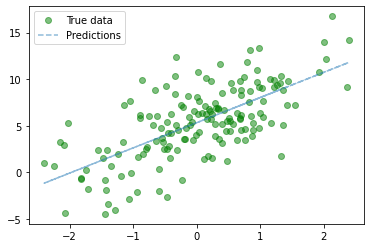

In [295]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

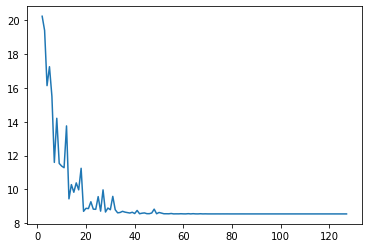

In [296]:
plt.plot(hs, train_loss)

In [274]:
hs

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [275]:
train_loss

[tensor(26.8884, grad_fn=<MseLossBackward>),
 tensor(27.4717, grad_fn=<MseLossBackward>),
 tensor(25.3259, grad_fn=<MseLossBackward>),
 tensor(22.0935, grad_fn=<MseLossBackward>),
 tensor(14.3431, grad_fn=<MseLossBackward>),
 tensor(15.5774, grad_fn=<MseLossBackward>),
 tensor(10.7030, grad_fn=<MseLossBackward>),
 tensor(10.6443, grad_fn=<MseLossBackward>),
 tensor(11.0862, grad_fn=<MseLossBackward>),
 tensor(14.9965, grad_fn=<MseLossBackward>),
 tensor(13.0752, grad_fn=<MseLossBackward>),
 tensor(9.2329, grad_fn=<MseLossBackward>),
 tensor(8.4607, grad_fn=<MseLossBackward>),
 tensor(12.2718, grad_fn=<MseLossBackward>),
 tensor(8.7895, grad_fn=<MseLossBackward>),
 tensor(9.2430, grad_fn=<MseLossBackward>),
 tensor(8.6987, grad_fn=<MseLossBackward>),
 tensor(11.2645, grad_fn=<MseLossBackward>),
 tensor(9.6928, grad_fn=<MseLossBackward>),
 tensor(9.2111, grad_fn=<MseLossBackward>),
 tensor(8.5069, grad_fn=<MseLossBackward>),
 tensor(8.8537, grad_fn=<MseLossBackward>),
 tensor(8.3605, gra

In [297]:
test_loss = []
model.eval()
with torch.no_grad():
    for h in range(2, hidden_sizes, 1):
        model = NN(inputDim, h, outputDim)
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
        for epoch in range(epochs):
            if torch.cuda.is_available():
                inputs = Variable(torch.from_numpy(x_test).cuda())
                labels = Variable(torch.from_numpy(y_test).cuda())
            else:
                inputs = Variable(torch.from_numpy(x_test))
                labels = Variable(torch.from_numpy(y_test))
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))
        test_loss.append(loss)

h: 2 | epoch: 0, loss: 31.523086547851562
h: 2 | epoch: 1, loss: 31.523086547851562
h: 2 | epoch: 2, loss: 31.523086547851562
h: 2 | epoch: 3, loss: 31.523086547851562
h: 2 | epoch: 4, loss: 31.523086547851562
h: 2 | epoch: 5, loss: 31.523086547851562
h: 2 | epoch: 6, loss: 31.523086547851562
h: 2 | epoch: 7, loss: 31.523086547851562
h: 2 | epoch: 8, loss: 31.523086547851562
h: 2 | epoch: 9, loss: 31.523086547851562
h: 2 | epoch: 10, loss: 31.523086547851562
h: 2 | epoch: 11, loss: 31.523086547851562
h: 2 | epoch: 12, loss: 31.523086547851562
h: 2 | epoch: 13, loss: 31.523086547851562
h: 2 | epoch: 14, loss: 31.523086547851562
h: 2 | epoch: 15, loss: 31.523086547851562
h: 2 | epoch: 16, loss: 31.523086547851562
h: 2 | epoch: 17, loss: 31.523086547851562
h: 2 | epoch: 18, loss: 31.523086547851562
h: 2 | epoch: 19, loss: 31.523086547851562
h: 2 | epoch: 20, loss: 31.523086547851562
h: 2 | epoch: 21, loss: 31.523086547851562
h: 2 | epoch: 22, loss: 31.523086547851562
h: 2 | epoch: 23, los

h: 7 | epoch: 82, loss: 41.380958557128906
h: 7 | epoch: 83, loss: 41.380958557128906
h: 7 | epoch: 84, loss: 41.380958557128906
h: 7 | epoch: 85, loss: 41.380958557128906
h: 7 | epoch: 86, loss: 41.380958557128906
h: 7 | epoch: 87, loss: 41.380958557128906
h: 7 | epoch: 88, loss: 41.380958557128906
h: 7 | epoch: 89, loss: 41.380958557128906
h: 7 | epoch: 90, loss: 41.380958557128906
h: 7 | epoch: 91, loss: 41.380958557128906
h: 7 | epoch: 92, loss: 41.380958557128906
h: 7 | epoch: 93, loss: 41.380958557128906
h: 7 | epoch: 94, loss: 41.380958557128906
h: 7 | epoch: 95, loss: 41.380958557128906
h: 7 | epoch: 96, loss: 41.380958557128906
h: 7 | epoch: 97, loss: 41.380958557128906
h: 7 | epoch: 98, loss: 41.380958557128906
h: 7 | epoch: 99, loss: 41.380958557128906
h: 8 | epoch: 0, loss: 37.676307678222656
h: 8 | epoch: 1, loss: 37.676307678222656
h: 8 | epoch: 2, loss: 37.676307678222656
h: 8 | epoch: 3, loss: 37.676307678222656
h: 8 | epoch: 4, loss: 37.676307678222656
h: 8 | epoch: 5,

h: 14 | epoch: 2, loss: 42.91197204589844
h: 14 | epoch: 3, loss: 42.91197204589844
h: 14 | epoch: 4, loss: 42.91197204589844
h: 14 | epoch: 5, loss: 42.91197204589844
h: 14 | epoch: 6, loss: 42.91197204589844
h: 14 | epoch: 7, loss: 42.91197204589844
h: 14 | epoch: 8, loss: 42.91197204589844
h: 14 | epoch: 9, loss: 42.91197204589844
h: 14 | epoch: 10, loss: 42.91197204589844
h: 14 | epoch: 11, loss: 42.91197204589844
h: 14 | epoch: 12, loss: 42.91197204589844
h: 14 | epoch: 13, loss: 42.91197204589844
h: 14 | epoch: 14, loss: 42.91197204589844
h: 14 | epoch: 15, loss: 42.91197204589844
h: 14 | epoch: 16, loss: 42.91197204589844
h: 14 | epoch: 17, loss: 42.91197204589844
h: 14 | epoch: 18, loss: 42.91197204589844
h: 14 | epoch: 19, loss: 42.91197204589844
h: 14 | epoch: 20, loss: 42.91197204589844
h: 14 | epoch: 21, loss: 42.91197204589844
h: 14 | epoch: 22, loss: 42.91197204589844
h: 14 | epoch: 23, loss: 42.91197204589844
h: 14 | epoch: 24, loss: 42.91197204589844
h: 14 | epoch: 25, 

h: 20 | epoch: 15, loss: 37.673744201660156
h: 20 | epoch: 16, loss: 37.673744201660156
h: 20 | epoch: 17, loss: 37.673744201660156
h: 20 | epoch: 18, loss: 37.673744201660156
h: 20 | epoch: 19, loss: 37.673744201660156
h: 20 | epoch: 20, loss: 37.673744201660156
h: 20 | epoch: 21, loss: 37.673744201660156
h: 20 | epoch: 22, loss: 37.673744201660156
h: 20 | epoch: 23, loss: 37.673744201660156
h: 20 | epoch: 24, loss: 37.673744201660156
h: 20 | epoch: 25, loss: 37.673744201660156
h: 20 | epoch: 26, loss: 37.673744201660156
h: 20 | epoch: 27, loss: 37.673744201660156
h: 20 | epoch: 28, loss: 37.673744201660156
h: 20 | epoch: 29, loss: 37.673744201660156
h: 20 | epoch: 30, loss: 37.673744201660156
h: 20 | epoch: 31, loss: 37.673744201660156
h: 20 | epoch: 32, loss: 37.673744201660156
h: 20 | epoch: 33, loss: 37.673744201660156
h: 20 | epoch: 34, loss: 37.673744201660156
h: 20 | epoch: 35, loss: 37.673744201660156
h: 20 | epoch: 36, loss: 37.673744201660156
h: 20 | epoch: 37, loss: 37.6737

h: 25 | epoch: 49, loss: 40.90486526489258
h: 25 | epoch: 50, loss: 40.90486526489258
h: 25 | epoch: 51, loss: 40.90486526489258
h: 25 | epoch: 52, loss: 40.90486526489258
h: 25 | epoch: 53, loss: 40.90486526489258
h: 25 | epoch: 54, loss: 40.90486526489258
h: 25 | epoch: 55, loss: 40.90486526489258
h: 25 | epoch: 56, loss: 40.90486526489258
h: 25 | epoch: 57, loss: 40.90486526489258
h: 25 | epoch: 58, loss: 40.90486526489258
h: 25 | epoch: 59, loss: 40.90486526489258
h: 25 | epoch: 60, loss: 40.90486526489258
h: 25 | epoch: 61, loss: 40.90486526489258
h: 25 | epoch: 62, loss: 40.90486526489258
h: 25 | epoch: 63, loss: 40.90486526489258
h: 25 | epoch: 64, loss: 40.90486526489258
h: 25 | epoch: 65, loss: 40.90486526489258
h: 25 | epoch: 66, loss: 40.90486526489258
h: 25 | epoch: 67, loss: 40.90486526489258
h: 25 | epoch: 68, loss: 40.90486526489258
h: 25 | epoch: 69, loss: 40.90486526489258
h: 25 | epoch: 70, loss: 40.90486526489258
h: 25 | epoch: 71, loss: 40.90486526489258
h: 25 | epo

h: 31 | epoch: 46, loss: 43.871498107910156
h: 31 | epoch: 47, loss: 43.871498107910156
h: 31 | epoch: 48, loss: 43.871498107910156
h: 31 | epoch: 49, loss: 43.871498107910156
h: 31 | epoch: 50, loss: 43.871498107910156
h: 31 | epoch: 51, loss: 43.871498107910156
h: 31 | epoch: 52, loss: 43.871498107910156
h: 31 | epoch: 53, loss: 43.871498107910156
h: 31 | epoch: 54, loss: 43.871498107910156
h: 31 | epoch: 55, loss: 43.871498107910156
h: 31 | epoch: 56, loss: 43.871498107910156
h: 31 | epoch: 57, loss: 43.871498107910156
h: 31 | epoch: 58, loss: 43.871498107910156
h: 31 | epoch: 59, loss: 43.871498107910156
h: 31 | epoch: 60, loss: 43.871498107910156
h: 31 | epoch: 61, loss: 43.871498107910156
h: 31 | epoch: 62, loss: 43.871498107910156
h: 31 | epoch: 63, loss: 43.871498107910156
h: 31 | epoch: 64, loss: 43.871498107910156
h: 31 | epoch: 65, loss: 43.871498107910156
h: 31 | epoch: 66, loss: 43.871498107910156
h: 31 | epoch: 67, loss: 43.871498107910156
h: 31 | epoch: 68, loss: 43.8714

h: 37 | epoch: 18, loss: 47.097686767578125
h: 37 | epoch: 19, loss: 47.097686767578125
h: 37 | epoch: 20, loss: 47.097686767578125
h: 37 | epoch: 21, loss: 47.097686767578125
h: 37 | epoch: 22, loss: 47.097686767578125
h: 37 | epoch: 23, loss: 47.097686767578125
h: 37 | epoch: 24, loss: 47.097686767578125
h: 37 | epoch: 25, loss: 47.097686767578125
h: 37 | epoch: 26, loss: 47.097686767578125
h: 37 | epoch: 27, loss: 47.097686767578125
h: 37 | epoch: 28, loss: 47.097686767578125
h: 37 | epoch: 29, loss: 47.097686767578125
h: 37 | epoch: 30, loss: 47.097686767578125
h: 37 | epoch: 31, loss: 47.097686767578125
h: 37 | epoch: 32, loss: 47.097686767578125
h: 37 | epoch: 33, loss: 47.097686767578125
h: 37 | epoch: 34, loss: 47.097686767578125
h: 37 | epoch: 35, loss: 47.097686767578125
h: 37 | epoch: 36, loss: 47.097686767578125
h: 37 | epoch: 37, loss: 47.097686767578125
h: 37 | epoch: 38, loss: 47.097686767578125
h: 37 | epoch: 39, loss: 47.097686767578125
h: 37 | epoch: 40, loss: 47.0976

h: 41 | epoch: 84, loss: 38.9361572265625
h: 41 | epoch: 85, loss: 38.9361572265625
h: 41 | epoch: 86, loss: 38.9361572265625
h: 41 | epoch: 87, loss: 38.9361572265625
h: 41 | epoch: 88, loss: 38.9361572265625
h: 41 | epoch: 89, loss: 38.9361572265625
h: 41 | epoch: 90, loss: 38.9361572265625
h: 41 | epoch: 91, loss: 38.9361572265625
h: 41 | epoch: 92, loss: 38.9361572265625
h: 41 | epoch: 93, loss: 38.9361572265625
h: 41 | epoch: 94, loss: 38.9361572265625
h: 41 | epoch: 95, loss: 38.9361572265625
h: 41 | epoch: 96, loss: 38.9361572265625
h: 41 | epoch: 97, loss: 38.9361572265625
h: 41 | epoch: 98, loss: 38.9361572265625
h: 41 | epoch: 99, loss: 38.9361572265625
h: 42 | epoch: 0, loss: 36.158714294433594
h: 42 | epoch: 1, loss: 36.158714294433594
h: 42 | epoch: 2, loss: 36.158714294433594
h: 42 | epoch: 3, loss: 36.158714294433594
h: 42 | epoch: 4, loss: 36.158714294433594
h: 42 | epoch: 5, loss: 36.158714294433594
h: 42 | epoch: 6, loss: 36.158714294433594
h: 42 | epoch: 7, loss: 36.

h: 46 | epoch: 45, loss: 44.172447204589844
h: 46 | epoch: 46, loss: 44.172447204589844
h: 46 | epoch: 47, loss: 44.172447204589844
h: 46 | epoch: 48, loss: 44.172447204589844
h: 46 | epoch: 49, loss: 44.172447204589844
h: 46 | epoch: 50, loss: 44.172447204589844
h: 46 | epoch: 51, loss: 44.172447204589844
h: 46 | epoch: 52, loss: 44.172447204589844
h: 46 | epoch: 53, loss: 44.172447204589844
h: 46 | epoch: 54, loss: 44.172447204589844
h: 46 | epoch: 55, loss: 44.172447204589844
h: 46 | epoch: 56, loss: 44.172447204589844
h: 46 | epoch: 57, loss: 44.172447204589844
h: 46 | epoch: 58, loss: 44.172447204589844
h: 46 | epoch: 59, loss: 44.172447204589844
h: 46 | epoch: 60, loss: 44.172447204589844
h: 46 | epoch: 61, loss: 44.172447204589844
h: 46 | epoch: 62, loss: 44.172447204589844
h: 46 | epoch: 63, loss: 44.172447204589844
h: 46 | epoch: 64, loss: 44.172447204589844
h: 46 | epoch: 65, loss: 44.172447204589844
h: 46 | epoch: 66, loss: 44.172447204589844
h: 46 | epoch: 67, loss: 44.1724

h: 50 | epoch: 73, loss: 37.53116989135742
h: 50 | epoch: 74, loss: 37.53116989135742
h: 50 | epoch: 75, loss: 37.53116989135742
h: 50 | epoch: 76, loss: 37.53116989135742
h: 50 | epoch: 77, loss: 37.53116989135742
h: 50 | epoch: 78, loss: 37.53116989135742
h: 50 | epoch: 79, loss: 37.53116989135742
h: 50 | epoch: 80, loss: 37.53116989135742
h: 50 | epoch: 81, loss: 37.53116989135742
h: 50 | epoch: 82, loss: 37.53116989135742
h: 50 | epoch: 83, loss: 37.53116989135742
h: 50 | epoch: 84, loss: 37.53116989135742
h: 50 | epoch: 85, loss: 37.53116989135742
h: 50 | epoch: 86, loss: 37.53116989135742
h: 50 | epoch: 87, loss: 37.53116989135742
h: 50 | epoch: 88, loss: 37.53116989135742
h: 50 | epoch: 89, loss: 37.53116989135742
h: 50 | epoch: 90, loss: 37.53116989135742
h: 50 | epoch: 91, loss: 37.53116989135742
h: 50 | epoch: 92, loss: 37.53116989135742
h: 50 | epoch: 93, loss: 37.53116989135742
h: 50 | epoch: 94, loss: 37.53116989135742
h: 50 | epoch: 95, loss: 37.53116989135742
h: 50 | epo

h: 55 | epoch: 29, loss: 36.1093635559082
h: 55 | epoch: 30, loss: 36.1093635559082
h: 55 | epoch: 31, loss: 36.1093635559082
h: 55 | epoch: 32, loss: 36.1093635559082
h: 55 | epoch: 33, loss: 36.1093635559082
h: 55 | epoch: 34, loss: 36.1093635559082
h: 55 | epoch: 35, loss: 36.1093635559082
h: 55 | epoch: 36, loss: 36.1093635559082
h: 55 | epoch: 37, loss: 36.1093635559082
h: 55 | epoch: 38, loss: 36.1093635559082
h: 55 | epoch: 39, loss: 36.1093635559082
h: 55 | epoch: 40, loss: 36.1093635559082
h: 55 | epoch: 41, loss: 36.1093635559082
h: 55 | epoch: 42, loss: 36.1093635559082
h: 55 | epoch: 43, loss: 36.1093635559082
h: 55 | epoch: 44, loss: 36.1093635559082
h: 55 | epoch: 45, loss: 36.1093635559082
h: 55 | epoch: 46, loss: 36.1093635559082
h: 55 | epoch: 47, loss: 36.1093635559082
h: 55 | epoch: 48, loss: 36.1093635559082
h: 55 | epoch: 49, loss: 36.1093635559082
h: 55 | epoch: 50, loss: 36.1093635559082
h: 55 | epoch: 51, loss: 36.1093635559082
h: 55 | epoch: 52, loss: 36.109363

h: 60 | epoch: 12, loss: 34.786617279052734
h: 60 | epoch: 13, loss: 34.786617279052734
h: 60 | epoch: 14, loss: 34.786617279052734
h: 60 | epoch: 15, loss: 34.786617279052734
h: 60 | epoch: 16, loss: 34.786617279052734
h: 60 | epoch: 17, loss: 34.786617279052734
h: 60 | epoch: 18, loss: 34.786617279052734
h: 60 | epoch: 19, loss: 34.786617279052734
h: 60 | epoch: 20, loss: 34.786617279052734
h: 60 | epoch: 21, loss: 34.786617279052734
h: 60 | epoch: 22, loss: 34.786617279052734
h: 60 | epoch: 23, loss: 34.786617279052734
h: 60 | epoch: 24, loss: 34.786617279052734
h: 60 | epoch: 25, loss: 34.786617279052734
h: 60 | epoch: 26, loss: 34.786617279052734
h: 60 | epoch: 27, loss: 34.786617279052734
h: 60 | epoch: 28, loss: 34.786617279052734
h: 60 | epoch: 29, loss: 34.786617279052734
h: 60 | epoch: 30, loss: 34.786617279052734
h: 60 | epoch: 31, loss: 34.786617279052734
h: 60 | epoch: 32, loss: 34.786617279052734
h: 60 | epoch: 33, loss: 34.786617279052734
h: 60 | epoch: 34, loss: 34.7866

h: 64 | epoch: 96, loss: 41.310020446777344
h: 64 | epoch: 97, loss: 41.310020446777344
h: 64 | epoch: 98, loss: 41.310020446777344
h: 64 | epoch: 99, loss: 41.310020446777344
h: 65 | epoch: 0, loss: 49.912757873535156
h: 65 | epoch: 1, loss: 49.912757873535156
h: 65 | epoch: 2, loss: 49.912757873535156
h: 65 | epoch: 3, loss: 49.912757873535156
h: 65 | epoch: 4, loss: 49.912757873535156
h: 65 | epoch: 5, loss: 49.912757873535156
h: 65 | epoch: 6, loss: 49.912757873535156
h: 65 | epoch: 7, loss: 49.912757873535156
h: 65 | epoch: 8, loss: 49.912757873535156
h: 65 | epoch: 9, loss: 49.912757873535156
h: 65 | epoch: 10, loss: 49.912757873535156
h: 65 | epoch: 11, loss: 49.912757873535156
h: 65 | epoch: 12, loss: 49.912757873535156
h: 65 | epoch: 13, loss: 49.912757873535156
h: 65 | epoch: 14, loss: 49.912757873535156
h: 65 | epoch: 15, loss: 49.912757873535156
h: 65 | epoch: 16, loss: 49.912757873535156
h: 65 | epoch: 17, loss: 49.912757873535156
h: 65 | epoch: 18, loss: 49.91275787353515

h: 69 | epoch: 42, loss: 42.09621810913086
h: 69 | epoch: 43, loss: 42.09621810913086
h: 69 | epoch: 44, loss: 42.09621810913086
h: 69 | epoch: 45, loss: 42.09621810913086
h: 69 | epoch: 46, loss: 42.09621810913086
h: 69 | epoch: 47, loss: 42.09621810913086
h: 69 | epoch: 48, loss: 42.09621810913086
h: 69 | epoch: 49, loss: 42.09621810913086
h: 69 | epoch: 50, loss: 42.09621810913086
h: 69 | epoch: 51, loss: 42.09621810913086
h: 69 | epoch: 52, loss: 42.09621810913086
h: 69 | epoch: 53, loss: 42.09621810913086
h: 69 | epoch: 54, loss: 42.09621810913086
h: 69 | epoch: 55, loss: 42.09621810913086
h: 69 | epoch: 56, loss: 42.09621810913086
h: 69 | epoch: 57, loss: 42.09621810913086
h: 69 | epoch: 58, loss: 42.09621810913086
h: 69 | epoch: 59, loss: 42.09621810913086
h: 69 | epoch: 60, loss: 42.09621810913086
h: 69 | epoch: 61, loss: 42.09621810913086
h: 69 | epoch: 62, loss: 42.09621810913086
h: 69 | epoch: 63, loss: 42.09621810913086
h: 69 | epoch: 64, loss: 42.09621810913086
h: 69 | epo

h: 73 | epoch: 74, loss: 40.898109436035156
h: 73 | epoch: 75, loss: 40.898109436035156
h: 73 | epoch: 76, loss: 40.898109436035156
h: 73 | epoch: 77, loss: 40.898109436035156
h: 73 | epoch: 78, loss: 40.898109436035156
h: 73 | epoch: 79, loss: 40.898109436035156
h: 73 | epoch: 80, loss: 40.898109436035156
h: 73 | epoch: 81, loss: 40.898109436035156
h: 73 | epoch: 82, loss: 40.898109436035156
h: 73 | epoch: 83, loss: 40.898109436035156
h: 73 | epoch: 84, loss: 40.898109436035156
h: 73 | epoch: 85, loss: 40.898109436035156
h: 73 | epoch: 86, loss: 40.898109436035156
h: 73 | epoch: 87, loss: 40.898109436035156
h: 73 | epoch: 88, loss: 40.898109436035156
h: 73 | epoch: 89, loss: 40.898109436035156
h: 73 | epoch: 90, loss: 40.898109436035156
h: 73 | epoch: 91, loss: 40.898109436035156
h: 73 | epoch: 92, loss: 40.898109436035156
h: 73 | epoch: 93, loss: 40.898109436035156
h: 73 | epoch: 94, loss: 40.898109436035156
h: 73 | epoch: 95, loss: 40.898109436035156
h: 73 | epoch: 96, loss: 40.8981

h: 77 | epoch: 89, loss: 39.23154830932617
h: 77 | epoch: 90, loss: 39.23154830932617
h: 77 | epoch: 91, loss: 39.23154830932617
h: 77 | epoch: 92, loss: 39.23154830932617
h: 77 | epoch: 93, loss: 39.23154830932617
h: 77 | epoch: 94, loss: 39.23154830932617
h: 77 | epoch: 95, loss: 39.23154830932617
h: 77 | epoch: 96, loss: 39.23154830932617
h: 77 | epoch: 97, loss: 39.23154830932617
h: 77 | epoch: 98, loss: 39.23154830932617
h: 77 | epoch: 99, loss: 39.23154830932617
h: 78 | epoch: 0, loss: 38.3084716796875
h: 78 | epoch: 1, loss: 38.3084716796875
h: 78 | epoch: 2, loss: 38.3084716796875
h: 78 | epoch: 3, loss: 38.3084716796875
h: 78 | epoch: 4, loss: 38.3084716796875
h: 78 | epoch: 5, loss: 38.3084716796875
h: 78 | epoch: 6, loss: 38.3084716796875
h: 78 | epoch: 7, loss: 38.3084716796875
h: 78 | epoch: 8, loss: 38.3084716796875
h: 78 | epoch: 9, loss: 38.3084716796875
h: 78 | epoch: 10, loss: 38.3084716796875
h: 78 | epoch: 11, loss: 38.3084716796875
h: 78 | epoch: 12, loss: 38.30847

h: 82 | epoch: 43, loss: 40.321372985839844
h: 82 | epoch: 44, loss: 40.321372985839844
h: 82 | epoch: 45, loss: 40.321372985839844
h: 82 | epoch: 46, loss: 40.321372985839844
h: 82 | epoch: 47, loss: 40.321372985839844
h: 82 | epoch: 48, loss: 40.321372985839844
h: 82 | epoch: 49, loss: 40.321372985839844
h: 82 | epoch: 50, loss: 40.321372985839844
h: 82 | epoch: 51, loss: 40.321372985839844
h: 82 | epoch: 52, loss: 40.321372985839844
h: 82 | epoch: 53, loss: 40.321372985839844
h: 82 | epoch: 54, loss: 40.321372985839844
h: 82 | epoch: 55, loss: 40.321372985839844
h: 82 | epoch: 56, loss: 40.321372985839844
h: 82 | epoch: 57, loss: 40.321372985839844
h: 82 | epoch: 58, loss: 40.321372985839844
h: 82 | epoch: 59, loss: 40.321372985839844
h: 82 | epoch: 60, loss: 40.321372985839844
h: 82 | epoch: 61, loss: 40.321372985839844
h: 82 | epoch: 62, loss: 40.321372985839844
h: 82 | epoch: 63, loss: 40.321372985839844
h: 82 | epoch: 64, loss: 40.321372985839844
h: 82 | epoch: 65, loss: 40.3213

h: 88 | epoch: 75, loss: 37.327659606933594
h: 88 | epoch: 76, loss: 37.327659606933594
h: 88 | epoch: 77, loss: 37.327659606933594
h: 88 | epoch: 78, loss: 37.327659606933594
h: 88 | epoch: 79, loss: 37.327659606933594
h: 88 | epoch: 80, loss: 37.327659606933594
h: 88 | epoch: 81, loss: 37.327659606933594
h: 88 | epoch: 82, loss: 37.327659606933594
h: 88 | epoch: 83, loss: 37.327659606933594
h: 88 | epoch: 84, loss: 37.327659606933594
h: 88 | epoch: 85, loss: 37.327659606933594
h: 88 | epoch: 86, loss: 37.327659606933594
h: 88 | epoch: 87, loss: 37.327659606933594
h: 88 | epoch: 88, loss: 37.327659606933594
h: 88 | epoch: 89, loss: 37.327659606933594
h: 88 | epoch: 90, loss: 37.327659606933594
h: 88 | epoch: 91, loss: 37.327659606933594
h: 88 | epoch: 92, loss: 37.327659606933594
h: 88 | epoch: 93, loss: 37.327659606933594
h: 88 | epoch: 94, loss: 37.327659606933594
h: 88 | epoch: 95, loss: 37.327659606933594
h: 88 | epoch: 96, loss: 37.327659606933594
h: 88 | epoch: 97, loss: 37.3276

h: 95 | epoch: 12, loss: 45.625614166259766
h: 95 | epoch: 13, loss: 45.625614166259766
h: 95 | epoch: 14, loss: 45.625614166259766
h: 95 | epoch: 15, loss: 45.625614166259766
h: 95 | epoch: 16, loss: 45.625614166259766
h: 95 | epoch: 17, loss: 45.625614166259766
h: 95 | epoch: 18, loss: 45.625614166259766
h: 95 | epoch: 19, loss: 45.625614166259766
h: 95 | epoch: 20, loss: 45.625614166259766
h: 95 | epoch: 21, loss: 45.625614166259766
h: 95 | epoch: 22, loss: 45.625614166259766
h: 95 | epoch: 23, loss: 45.625614166259766
h: 95 | epoch: 24, loss: 45.625614166259766
h: 95 | epoch: 25, loss: 45.625614166259766
h: 95 | epoch: 26, loss: 45.625614166259766
h: 95 | epoch: 27, loss: 45.625614166259766
h: 95 | epoch: 28, loss: 45.625614166259766
h: 95 | epoch: 29, loss: 45.625614166259766
h: 95 | epoch: 30, loss: 45.625614166259766
h: 95 | epoch: 31, loss: 45.625614166259766
h: 95 | epoch: 32, loss: 45.625614166259766
h: 95 | epoch: 33, loss: 45.625614166259766
h: 95 | epoch: 34, loss: 45.6256

h: 99 | epoch: 54, loss: 49.454734802246094
h: 99 | epoch: 55, loss: 49.454734802246094
h: 99 | epoch: 56, loss: 49.454734802246094
h: 99 | epoch: 57, loss: 49.454734802246094
h: 99 | epoch: 58, loss: 49.454734802246094
h: 99 | epoch: 59, loss: 49.454734802246094
h: 99 | epoch: 60, loss: 49.454734802246094
h: 99 | epoch: 61, loss: 49.454734802246094
h: 99 | epoch: 62, loss: 49.454734802246094
h: 99 | epoch: 63, loss: 49.454734802246094
h: 99 | epoch: 64, loss: 49.454734802246094
h: 99 | epoch: 65, loss: 49.454734802246094
h: 99 | epoch: 66, loss: 49.454734802246094
h: 99 | epoch: 67, loss: 49.454734802246094
h: 99 | epoch: 68, loss: 49.454734802246094
h: 99 | epoch: 69, loss: 49.454734802246094
h: 99 | epoch: 70, loss: 49.454734802246094
h: 99 | epoch: 71, loss: 49.454734802246094
h: 99 | epoch: 72, loss: 49.454734802246094
h: 99 | epoch: 73, loss: 49.454734802246094
h: 99 | epoch: 74, loss: 49.454734802246094
h: 99 | epoch: 75, loss: 49.454734802246094
h: 99 | epoch: 76, loss: 49.4547

h: 104 | epoch: 52, loss: 35.768043518066406
h: 104 | epoch: 53, loss: 35.768043518066406
h: 104 | epoch: 54, loss: 35.768043518066406
h: 104 | epoch: 55, loss: 35.768043518066406
h: 104 | epoch: 56, loss: 35.768043518066406
h: 104 | epoch: 57, loss: 35.768043518066406
h: 104 | epoch: 58, loss: 35.768043518066406
h: 104 | epoch: 59, loss: 35.768043518066406
h: 104 | epoch: 60, loss: 35.768043518066406
h: 104 | epoch: 61, loss: 35.768043518066406
h: 104 | epoch: 62, loss: 35.768043518066406
h: 104 | epoch: 63, loss: 35.768043518066406
h: 104 | epoch: 64, loss: 35.768043518066406
h: 104 | epoch: 65, loss: 35.768043518066406
h: 104 | epoch: 66, loss: 35.768043518066406
h: 104 | epoch: 67, loss: 35.768043518066406
h: 104 | epoch: 68, loss: 35.768043518066406
h: 104 | epoch: 69, loss: 35.768043518066406
h: 104 | epoch: 70, loss: 35.768043518066406
h: 104 | epoch: 71, loss: 35.768043518066406
h: 104 | epoch: 72, loss: 35.768043518066406
h: 104 | epoch: 73, loss: 35.768043518066406
h: 104 | e

h: 109 | epoch: 25, loss: 46.84294128417969
h: 109 | epoch: 26, loss: 46.84294128417969
h: 109 | epoch: 27, loss: 46.84294128417969
h: 109 | epoch: 28, loss: 46.84294128417969
h: 109 | epoch: 29, loss: 46.84294128417969
h: 109 | epoch: 30, loss: 46.84294128417969
h: 109 | epoch: 31, loss: 46.84294128417969
h: 109 | epoch: 32, loss: 46.84294128417969
h: 109 | epoch: 33, loss: 46.84294128417969
h: 109 | epoch: 34, loss: 46.84294128417969
h: 109 | epoch: 35, loss: 46.84294128417969
h: 109 | epoch: 36, loss: 46.84294128417969
h: 109 | epoch: 37, loss: 46.84294128417969
h: 109 | epoch: 38, loss: 46.84294128417969
h: 109 | epoch: 39, loss: 46.84294128417969
h: 109 | epoch: 40, loss: 46.84294128417969
h: 109 | epoch: 41, loss: 46.84294128417969
h: 109 | epoch: 42, loss: 46.84294128417969
h: 109 | epoch: 43, loss: 46.84294128417969
h: 109 | epoch: 44, loss: 46.84294128417969
h: 109 | epoch: 45, loss: 46.84294128417969
h: 109 | epoch: 46, loss: 46.84294128417969
h: 109 | epoch: 47, loss: 46.842

h: 113 | epoch: 83, loss: 36.203773498535156
h: 113 | epoch: 84, loss: 36.203773498535156
h: 113 | epoch: 85, loss: 36.203773498535156
h: 113 | epoch: 86, loss: 36.203773498535156
h: 113 | epoch: 87, loss: 36.203773498535156
h: 113 | epoch: 88, loss: 36.203773498535156
h: 113 | epoch: 89, loss: 36.203773498535156
h: 113 | epoch: 90, loss: 36.203773498535156
h: 113 | epoch: 91, loss: 36.203773498535156
h: 113 | epoch: 92, loss: 36.203773498535156
h: 113 | epoch: 93, loss: 36.203773498535156
h: 113 | epoch: 94, loss: 36.203773498535156
h: 113 | epoch: 95, loss: 36.203773498535156
h: 113 | epoch: 96, loss: 36.203773498535156
h: 113 | epoch: 97, loss: 36.203773498535156
h: 113 | epoch: 98, loss: 36.203773498535156
h: 113 | epoch: 99, loss: 36.203773498535156
h: 114 | epoch: 0, loss: 45.23552703857422
h: 114 | epoch: 1, loss: 45.23552703857422
h: 114 | epoch: 2, loss: 45.23552703857422
h: 114 | epoch: 3, loss: 45.23552703857422
h: 114 | epoch: 4, loss: 45.23552703857422
h: 114 | epoch: 5, l

h: 119 | epoch: 64, loss: 40.576332092285156
h: 119 | epoch: 65, loss: 40.576332092285156
h: 119 | epoch: 66, loss: 40.576332092285156
h: 119 | epoch: 67, loss: 40.576332092285156
h: 119 | epoch: 68, loss: 40.576332092285156
h: 119 | epoch: 69, loss: 40.576332092285156
h: 119 | epoch: 70, loss: 40.576332092285156
h: 119 | epoch: 71, loss: 40.576332092285156
h: 119 | epoch: 72, loss: 40.576332092285156
h: 119 | epoch: 73, loss: 40.576332092285156
h: 119 | epoch: 74, loss: 40.576332092285156
h: 119 | epoch: 75, loss: 40.576332092285156
h: 119 | epoch: 76, loss: 40.576332092285156
h: 119 | epoch: 77, loss: 40.576332092285156
h: 119 | epoch: 78, loss: 40.576332092285156
h: 119 | epoch: 79, loss: 40.576332092285156
h: 119 | epoch: 80, loss: 40.576332092285156
h: 119 | epoch: 81, loss: 40.576332092285156
h: 119 | epoch: 82, loss: 40.576332092285156
h: 119 | epoch: 83, loss: 40.576332092285156
h: 119 | epoch: 84, loss: 40.576332092285156
h: 119 | epoch: 85, loss: 40.576332092285156
h: 119 | e

h: 124 | epoch: 22, loss: 45.24346923828125
h: 124 | epoch: 23, loss: 45.24346923828125
h: 124 | epoch: 24, loss: 45.24346923828125
h: 124 | epoch: 25, loss: 45.24346923828125
h: 124 | epoch: 26, loss: 45.24346923828125
h: 124 | epoch: 27, loss: 45.24346923828125
h: 124 | epoch: 28, loss: 45.24346923828125
h: 124 | epoch: 29, loss: 45.24346923828125
h: 124 | epoch: 30, loss: 45.24346923828125
h: 124 | epoch: 31, loss: 45.24346923828125
h: 124 | epoch: 32, loss: 45.24346923828125
h: 124 | epoch: 33, loss: 45.24346923828125
h: 124 | epoch: 34, loss: 45.24346923828125
h: 124 | epoch: 35, loss: 45.24346923828125
h: 124 | epoch: 36, loss: 45.24346923828125
h: 124 | epoch: 37, loss: 45.24346923828125
h: 124 | epoch: 38, loss: 45.24346923828125
h: 124 | epoch: 39, loss: 45.24346923828125
h: 124 | epoch: 40, loss: 45.24346923828125
h: 124 | epoch: 41, loss: 45.24346923828125
h: 124 | epoch: 42, loss: 45.24346923828125
h: 124 | epoch: 43, loss: 45.24346923828125
h: 124 | epoch: 44, loss: 45.243

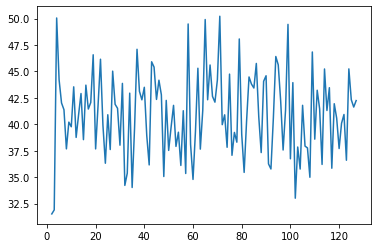

In [298]:
plt.plot(hs, test_loss)


In [299]:
test_loss

[tensor(31.5231),
 tensor(31.9024),
 tensor(50.0601),
 tensor(44.2095),
 tensor(42.0192),
 tensor(41.3810),
 tensor(37.6763),
 tensor(40.2054),
 tensor(39.7688),
 tensor(43.5451),
 tensor(38.7600),
 tensor(40.8960),
 tensor(42.9120),
 tensor(38.5495),
 tensor(43.7062),
 tensor(41.4455),
 tensor(42.0635),
 tensor(46.5787),
 tensor(37.6737),
 tensor(41.7817),
 tensor(46.1576),
 tensor(39.9270),
 tensor(36.3169),
 tensor(40.9049),
 tensor(37.6137),
 tensor(45.0300),
 tensor(41.8961),
 tensor(41.5134),
 tensor(38.0255),
 tensor(43.8715),
 tensor(34.2210),
 tensor(35.3780),
 tensor(42.9492),
 tensor(34.0222),
 tensor(39.6978),
 tensor(47.0977),
 tensor(43.1225),
 tensor(42.3177),
 tensor(43.5029),
 tensor(38.9362),
 tensor(36.1587),
 tensor(45.9158),
 tensor(45.4121),
 tensor(42.3545),
 tensor(44.1724),
 tensor(42.7906),
 tensor(35.0619),
 tensor(42.2630),
 tensor(37.5312),
 tensor(39.7372),
 tensor(41.7924),
 tensor(37.9095),
 tensor(39.2531),
 tensor(36.1094),
 tensor(41.2863),
 tensor(35